# DATA CLEANING & EDA

## Crude Oil Dataset Description

The dataset consists of **53 crude oil blends**. Each crude assay provides a detailed characterization of the crude’s physical, chemical, and distillation-based properties.

### 1. Independent Variables (Features)
These variables represent the input data used to characterize the crude oil blends.

| Category | Variable Name | Unit | Description |
| :--- | :--- | :--- | :--- |
| **Bulk Physical & Chemical** | `StdLiquidDensity` | kg/m³ | Standard liquid density of the crude. |
| | `SulfurByWt` | % | Total sulfur content by weight. |
| | `ConradsonCarbonByWt` | % | Carbon residue remaining after evaporation/pyrolysis. |
| | `NitrogenByWt` | % | Total nitrogen content by weight. |
| **Distillation Curve (TBP)** | **TBP Cut Points** | °C / °F | The temperature at which specific volume percentages boil off. |
| | *Fractions* | | 1%, 5%, 10%, 30%, 50%, 70%, 90%, 95%, 99% |

### 2. Target Variables (Outputs)
These are the properties targeted for prediction based on the independent variables.

#### 2.1 Set 1: Hydrocarbon Composition
| Variable Name | Description | Unit |
| :--- | :--- | :--- |
| `AromByWt` | Aromatics content by weight | % |
| `NaphthenesByWt` | Naphthenes content by weight | % |
| `ParaffinsByWt` | Paraffins content by weight | % |

#### 2.2 Set 2: Kinematic Viscosity (Primary Targets)
| Variable Name | Condition | Unit |
| :--- | :--- | :--- |
| `KinematicViscosity` | @ 37.78°C (100°F) | cSt |
| `KinematicViscosity` | @ 98.89°C (210°F) | cSt |

#### 2.3 Set 3: Additional Viscosity Targets (Sparse/If Available)
| Variable Name | Condition | Unit |
| :--- | :--- | :--- |
| `KinematicViscosity` | @ 20°C | cSt |
| `KinematicViscosity` | @ 40°C | cSt |
| `KinematicViscosity` | @ 50°C | cSt |
| `KinematicViscosity` | @ 100°C | cSt |
| `KinematicViscosity` | @ 150°C | cSt |

### 1. Import Data and Required Packages
####  1.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [133]:
#Importing Packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 1.2 Importing Extracted Data from 53 Crude Assays

In [134]:
#Importing CSV data as Pandas dataframe
df=pd.read_csv('dataset/Extracted_CrudeData.csv')

### 2. Dataset Description

In [135]:
#Show top 5 rows of the dataframe
df.head()

,Crude Name,StdLiquidDensity (kg/m3),SulfurByWt (%),ConradsonCarbonByWt (%),NitrogenByWt (%),Distillation Mass @ X Pct (C)@ 1 (%) - TBP,Distillation Mass @ X Pct (C)@ 5 (%) - TBP,Distillation Mass @ X Pct (C)@ 10 (%) - TBP,Distillation Mass @ X Pct (C)@ 30 (%) - TBP,Distillation Mass @ X Pct (C)@ 50 (%) - TBP,...,AromByWt (%),NaphthenesByWt (%),ParaffinsByWt (%),KinematicViscosity (cSt)@ 37.78 (C),KinematicViscosity (cSt)@ 98.89 (C),KinematicViscosity (cSt)@ 20 (C),KinematicViscosity (cSt)@ 40 (C),KinematicViscosity (cSt)@ 50 (C),KinematicViscosity (cSt)@ 100 (C),KinematicViscosity (cSt)@ 150 (C)
0,Akpo-2014,794.689603,0.070591,0.732083,0.062825,-16.244551,24.679712,74.031996,147.692242,231.447841,...,24.571141,41.011754,34.417105,1.7573028543796,0.833438,2.091216,1.700584,1.443025,0.824673,NaN
1,AlJurf-2014,874.431106,1.826957,5.241924,0.168953,26.236785,98.856864,138.763063,251.728374,354.117493,...,42.157942,36.772998,21.069060,7.05914911333451,2.025492,11.190540,6.703264,5.225721,1.991830,NaN
2,AlJurf-2015,872.972557,1.840926,5.365742,0.146255,26.408162,96.128866,135.041586,248.512058,351.412080,...,39.122494,39.730427,21.147079,6.77137102006056,2.010330,10.544402,6.437194,5.049799,1.977528,NaN
3,Ashtart-2015,870.860260,1.002298,5.194113,0.233022,17.461417,84.608073,121.721566,248.007854,358.275744,...,40.484153,44.017708,15.498139,6.6515298282988,1.990580,10.208774,6.317605,4.927973,1.959541,NaN
4,Azeri-Light-Supsa-2019,846.458826,0.147956,0.735866,0.113251,4.265112,81.831627,120.955400,229.274959,320.215604,...,21.364167,58.922758,19.713075,3.93702798465944,1.841686,5.117420,3.810679,3.255558,1.818677,NaN


In [136]:
#Shape of dataset
df.shape

(53, 24)

There are 53 columns and 24 rows

#### Renaming Columns

In [137]:
#Renaming columns for better readability
df.rename(columns={
    'Crude Name': 'Crude_Name',
    'StdLiquidDensity (kg/m3)': 'StdLiqDensity_kgm3',
    'SulfurByWt (%)': 'SulfurWt_pct',
    'ConradsonCarbonByWt (%)': 'ConradsonCarbon_wt_pct',
    'NitrogenByWt (%)': 'NitrogenWt_pct',
    
    'Distillation Mass @ X Pct (C)@ 1 (%) - TBP': 'TBP_TempAt_1pct',
    'Distillation Mass @ X Pct (C)@ 5 (%) - TBP': 'TBP_TempAt_5pct',
    'Distillation Mass @ X Pct (C)@ 10 (%) - TBP': 'TBP_TempAt_10pct',
    'Distillation Mass @ X Pct (C)@ 30 (%) - TBP': 'TBP_TempAt_30pct',
    'Distillation Mass @ X Pct (C)@ 50 (%) - TBP': 'TBP_TempAt_50pct',
    'Distillation Mass @ X Pct (C)@ 70 (%) - TBP': 'TBP_TempAt_70pct',
    'Distillation Mass @ X Pct (C)@ 90 (%) - TBP': 'TBP_TempAt_90pct',
    'Distillation Mass @ X Pct (C)@ 95 (%) - TBP': 'TBP_TempAt_95pct',
    'Distillation Mass @ X Pct (C)@ 99 (%) - TBP': 'TBP_TempAt_99pct',

    'AromByWt (%)': 'AromWt_pct',
    'NaphthenesByWt (%)': 'NaphWt_pct',
    'ParaffinsByWt (%)': 'ParaWt_pct',

    'KinematicViscosity (cSt)@ 37.78 (C)': 'KV_37.78c_cSt',
    'KinematicViscosity (cSt)@ 98.89 (C)': 'KV_98.89c_cSt',
    'KinematicViscosity (cSt)@ 20 (C)': 'KV_20c_cSt',
    'KinematicViscosity (cSt)@ 40 (C)': 'KV_40c_cSt',
    'KinematicViscosity (cSt)@ 50 (C)': 'KV_50c_cSt',
    'KinematicViscosity (cSt)@ 100 (C)': 'KV_100c_cSt',
    'KinematicViscosity (cSt)@ 150 (C)': 'KV_150c_cSt'
}, inplace=True)
df.head()


,Crude_Name,StdLiqDensity_kgm3,SulfurWt_pct,ConradsonCarbon_wt_pct,NitrogenWt_pct,TBP_TempAt_1pct,TBP_TempAt_5pct,TBP_TempAt_10pct,TBP_TempAt_30pct,TBP_TempAt_50pct,...,AromWt_pct,NaphWt_pct,ParaWt_pct,KV_37.78c_cSt,KV_98.89c_cSt,KV_20c_cSt,KV_40c_cSt,KV_50c_cSt,KV_100c_cSt,KV_150c_cSt
0,Akpo-2014,794.689603,0.070591,0.732083,0.062825,-16.244551,24.679712,74.031996,147.692242,231.447841,...,24.571141,41.011754,34.417105,1.7573028543796,0.833438,2.091216,1.700584,1.443025,0.824673,NaN
1,AlJurf-2014,874.431106,1.826957,5.241924,0.168953,26.236785,98.856864,138.763063,251.728374,354.117493,...,42.157942,36.772998,21.069060,7.05914911333451,2.025492,11.190540,6.703264,5.225721,1.991830,NaN
2,AlJurf-2015,872.972557,1.840926,5.365742,0.146255,26.408162,96.128866,135.041586,248.512058,351.412080,...,39.122494,39.730427,21.147079,6.77137102006056,2.010330,10.544402,6.437194,5.049799,1.977528,NaN
3,Ashtart-2015,870.860260,1.002298,5.194113,0.233022,17.461417,84.608073,121.721566,248.007854,358.275744,...,40.484153,44.017708,15.498139,6.6515298282988,1.990580,10.208774,6.317605,4.927973,1.959541,NaN
4,Azeri-Light-Supsa-2019,846.458826,0.147956,0.735866,0.113251,4.265112,81.831627,120.955400,229.274959,320.215604,...,21.364167,58.922758,19.713075,3.93702798465944,1.841686,5.117420,3.810679,3.255558,1.818677,NaN


### 3. Data Checks
#### 3.1 Check for Duplicate Values

In [138]:
#Checks for duplicate values
df.duplicated().sum()

np.int64(0)

There are no duplicate values.

#### 3.2 Check for Missing Values

In [139]:
#Checks for missing values
df.isna().sum()

Crude_Name                 0
StdLiqDensity_kgm3         0
SulfurWt_pct               0
ConradsonCarbon_wt_pct     0
NitrogenWt_pct             0
TBP_TempAt_1pct            0
TBP_TempAt_5pct            0
TBP_TempAt_10pct           0
TBP_TempAt_30pct           0
TBP_TempAt_50pct           0
TBP_TempAt_70pct           0
TBP_TempAt_90pct           0
TBP_TempAt_95pct           0
TBP_TempAt_99pct           0
AromWt_pct                 0
NaphWt_pct                 0
ParaWt_pct                 0
KV_37.78c_cSt              0
KV_98.89c_cSt              0
KV_20c_cSt                22
KV_40c_cSt                16
KV_50c_cSt                11
KV_100c_cSt               15
KV_150c_cSt               47
dtype: int64

In [140]:
#Deleting columns with more than 50% missing values
df.drop(columns='KV_150c_cSt', inplace=True)
df.shape

(53, 23)

#### 3.3 Check Data Types

In [141]:
#Exploring data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Crude_Name              53 non-null     object 
 1   StdLiqDensity_kgm3      53 non-null     float64
 2   SulfurWt_pct            53 non-null     float64
 3   ConradsonCarbon_wt_pct  53 non-null     float64
 4   NitrogenWt_pct          53 non-null     float64
 5   TBP_TempAt_1pct         53 non-null     float64
 6   TBP_TempAt_5pct         53 non-null     float64
 7   TBP_TempAt_10pct        53 non-null     float64
 8   TBP_TempAt_30pct        53 non-null     float64
 9   TBP_TempAt_50pct        53 non-null     float64
 10  TBP_TempAt_70pct        53 non-null     float64
 11  TBP_TempAt_90pct        53 non-null     float64
 12  TBP_TempAt_95pct        53 non-null     float64
 13  TBP_TempAt_99pct        53 non-null     float64
 14  AromWt_pct              53 non-null     floa

The column *KinematicViscosity (cSt)@ 37.78 (C)* shows datatype as object.

In [142]:
#Changing data types
df["KV_37.78c_cSt"] = pd.to_numeric(df["KV_37.78c_cSt"], errors="coerce")

In [143]:
#Numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 22 numerical features : ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct', 'TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct', 'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt', 'KV_20c_cSt', 'KV_40c_cSt', 'KV_50c_cSt', 'KV_100c_cSt']

We have 1 categorical features : ['Crude_Name']


#### 3.4 Check Unique Values

In [144]:
#Check unique values
df.nunique()

Crude_Name                53
StdLiqDensity_kgm3        53
SulfurWt_pct              53
ConradsonCarbon_wt_pct    53
NitrogenWt_pct            53
TBP_TempAt_1pct           53
TBP_TempAt_5pct           53
TBP_TempAt_10pct          53
TBP_TempAt_30pct          53
TBP_TempAt_50pct          53
TBP_TempAt_70pct          53
TBP_TempAt_90pct          53
TBP_TempAt_95pct          53
TBP_TempAt_99pct          53
AromWt_pct                53
NaphWt_pct                53
ParaWt_pct                53
KV_37.78c_cSt             52
KV_98.89c_cSt             53
KV_20c_cSt                31
KV_40c_cSt                37
KV_50c_cSt                42
KV_100c_cSt               38
dtype: int64

#### 3.5 Check Data Statistics

In [145]:
df.describe()

,StdLiqDensity_kgm3,SulfurWt_pct,ConradsonCarbon_wt_pct,NitrogenWt_pct,TBP_TempAt_1pct,TBP_TempAt_5pct,TBP_TempAt_10pct,TBP_TempAt_30pct,TBP_TempAt_50pct,TBP_TempAt_70pct,...,TBP_TempAt_99pct,AromWt_pct,NaphWt_pct,ParaWt_pct,KV_37.78c_cSt,KV_98.89c_cSt,KV_20c_cSt,KV_40c_cSt,KV_50c_cSt,KV_100c_cSt
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,52.000000,53.000000,31.000000,37.000000,42.000000,38.000000
mean,860.229109,1.096470,4.242377,0.139641,16.062648,82.024656,122.719719,240.998110,343.043350,454.255330,...,866.967580,38.396964,41.018674,20.584362,87.193147,4.945274,23.633030,95.711595,28.044594,2.443980
std,50.846978,1.386636,3.382032,0.091479,32.842606,39.149313,48.586240,78.137840,99.276546,119.185684,...,194.260194,15.571939,13.621675,10.301568,518.540488,16.020022,39.224819,511.459143,121.128554,2.142159
min,720.475090,0.003066,0.000859,0.000000,-84.112295,12.470906,33.973020,71.475104,101.998436,121.594913,...,246.584172,12.084214,13.717039,3.871940,0.687162,0.441290,0.708780,0.673395,0.608967,0.438059
25%,840.798849,0.133901,1.402823,0.062825,-2.575226,53.089252,94.307318,187.625195,293.420464,387.536924,...,755.921652,27.861692,32.837905,14.980284,3.289184,1.216232,3.340463,2.423022,2.258347,1.083937
50%,868.345739,0.414061,4.256021,0.132762,17.320183,75.714305,115.551297,247.773189,351.412080,468.225815,...,885.381839,35.885810,42.786668,18.722171,6.624201,2.025492,9.655222,6.248508,4.957210,1.906591
75%,880.904842,1.709908,5.565488,0.189987,32.013259,98.856864,138.763063,277.021743,399.112936,527.387644,...,995.506257,45.568112,50.123768,24.572272,12.370777,3.069816,17.772761,10.361374,7.179246,2.712003
max,1005.229103,6.472641,14.410395,0.426531,83.522019,194.855929,257.103174,399.438269,546.490643,696.362559,...,1296.957768,82.105582,74.773497,57.447748,3749.583456,117.979278,154.630736,3120.982343,788.108130,8.856360


#### Data Quality Checks

- Non-negative Property Values
- Monotonic increase of TBP distillation temperatures
- Hydrocarbon composition to approximately 100 wt%

In [146]:
#Columns that must be non-negative
nonnegative_cols = [
    'StdLiqDensity_kgm3',
    'SulfurWt_pct',
    'NitrogenWt_pct',
    'ConradsonCarbon_wt_pct',
    'AromWt_pct',
    'NaphWt_pct',
    'ParaWt_pct',
    'KV_20c_cSt',
    'KV_40c_cSt',
    'KV_50c_cSt',
    'KV_100c_cSt'
]
for col in nonnegative_cols:
    invalid_count = (df[col] < 0).sum()
    print(f"'{col}' = {invalid_count} negative values.") 

'StdLiqDensity_kgm3' = 0 negative values.
'SulfurWt_pct' = 0 negative values.
'NitrogenWt_pct' = 0 negative values.
'ConradsonCarbon_wt_pct' = 0 negative values.
'AromWt_pct' = 0 negative values.
'NaphWt_pct' = 0 negative values.
'ParaWt_pct' = 0 negative values.
'KV_20c_cSt' = 0 negative values.
'KV_40c_cSt' = 0 negative values.
'KV_50c_cSt' = 0 negative values.
'KV_100c_cSt' = 0 negative values.


In [147]:
#Check if any TBP temperature decreases across columns
TBP_cols = [
    'TBP_TempAt_1pct',
    'TBP_TempAt_5pct',
    'TBP_TempAt_10pct',
    'TBP_TempAt_30pct',
    'TBP_TempAt_50pct',
    'TBP_TempAt_70pct',
    'TBP_TempAt_90pct',
    'TBP_TempAt_95pct',
    'TBP_TempAt_99pct'
]

tbp_violations = (df[TBP_cols] < df[TBP_cols].shift(axis=1)).any(axis=1)
print(f"Number of rows with TBP temperature violations",tbp_violations.sum())

Number of rows with TBP temperature violations 0


In [148]:
#Sum of aromatics + naphthenes + paraffins
df['Composition'] = df[['AromWt_pct', 'NaphWt_pct', 'ParaWt_pct']].sum(axis=1)

#Check outside tolerance (95–105%)
composition_violations = (df['Composition'] < 95) | (df['Composition'] > 105)
print("Composition sum violations:", composition_violations.sum())


Composition sum violations: 0


### 4. Data Visualization
#### Missing Values with Heatmap

### 4.1 UNIVARIATE ANALYSIS
#### 4.1.1 Histogram with KDE

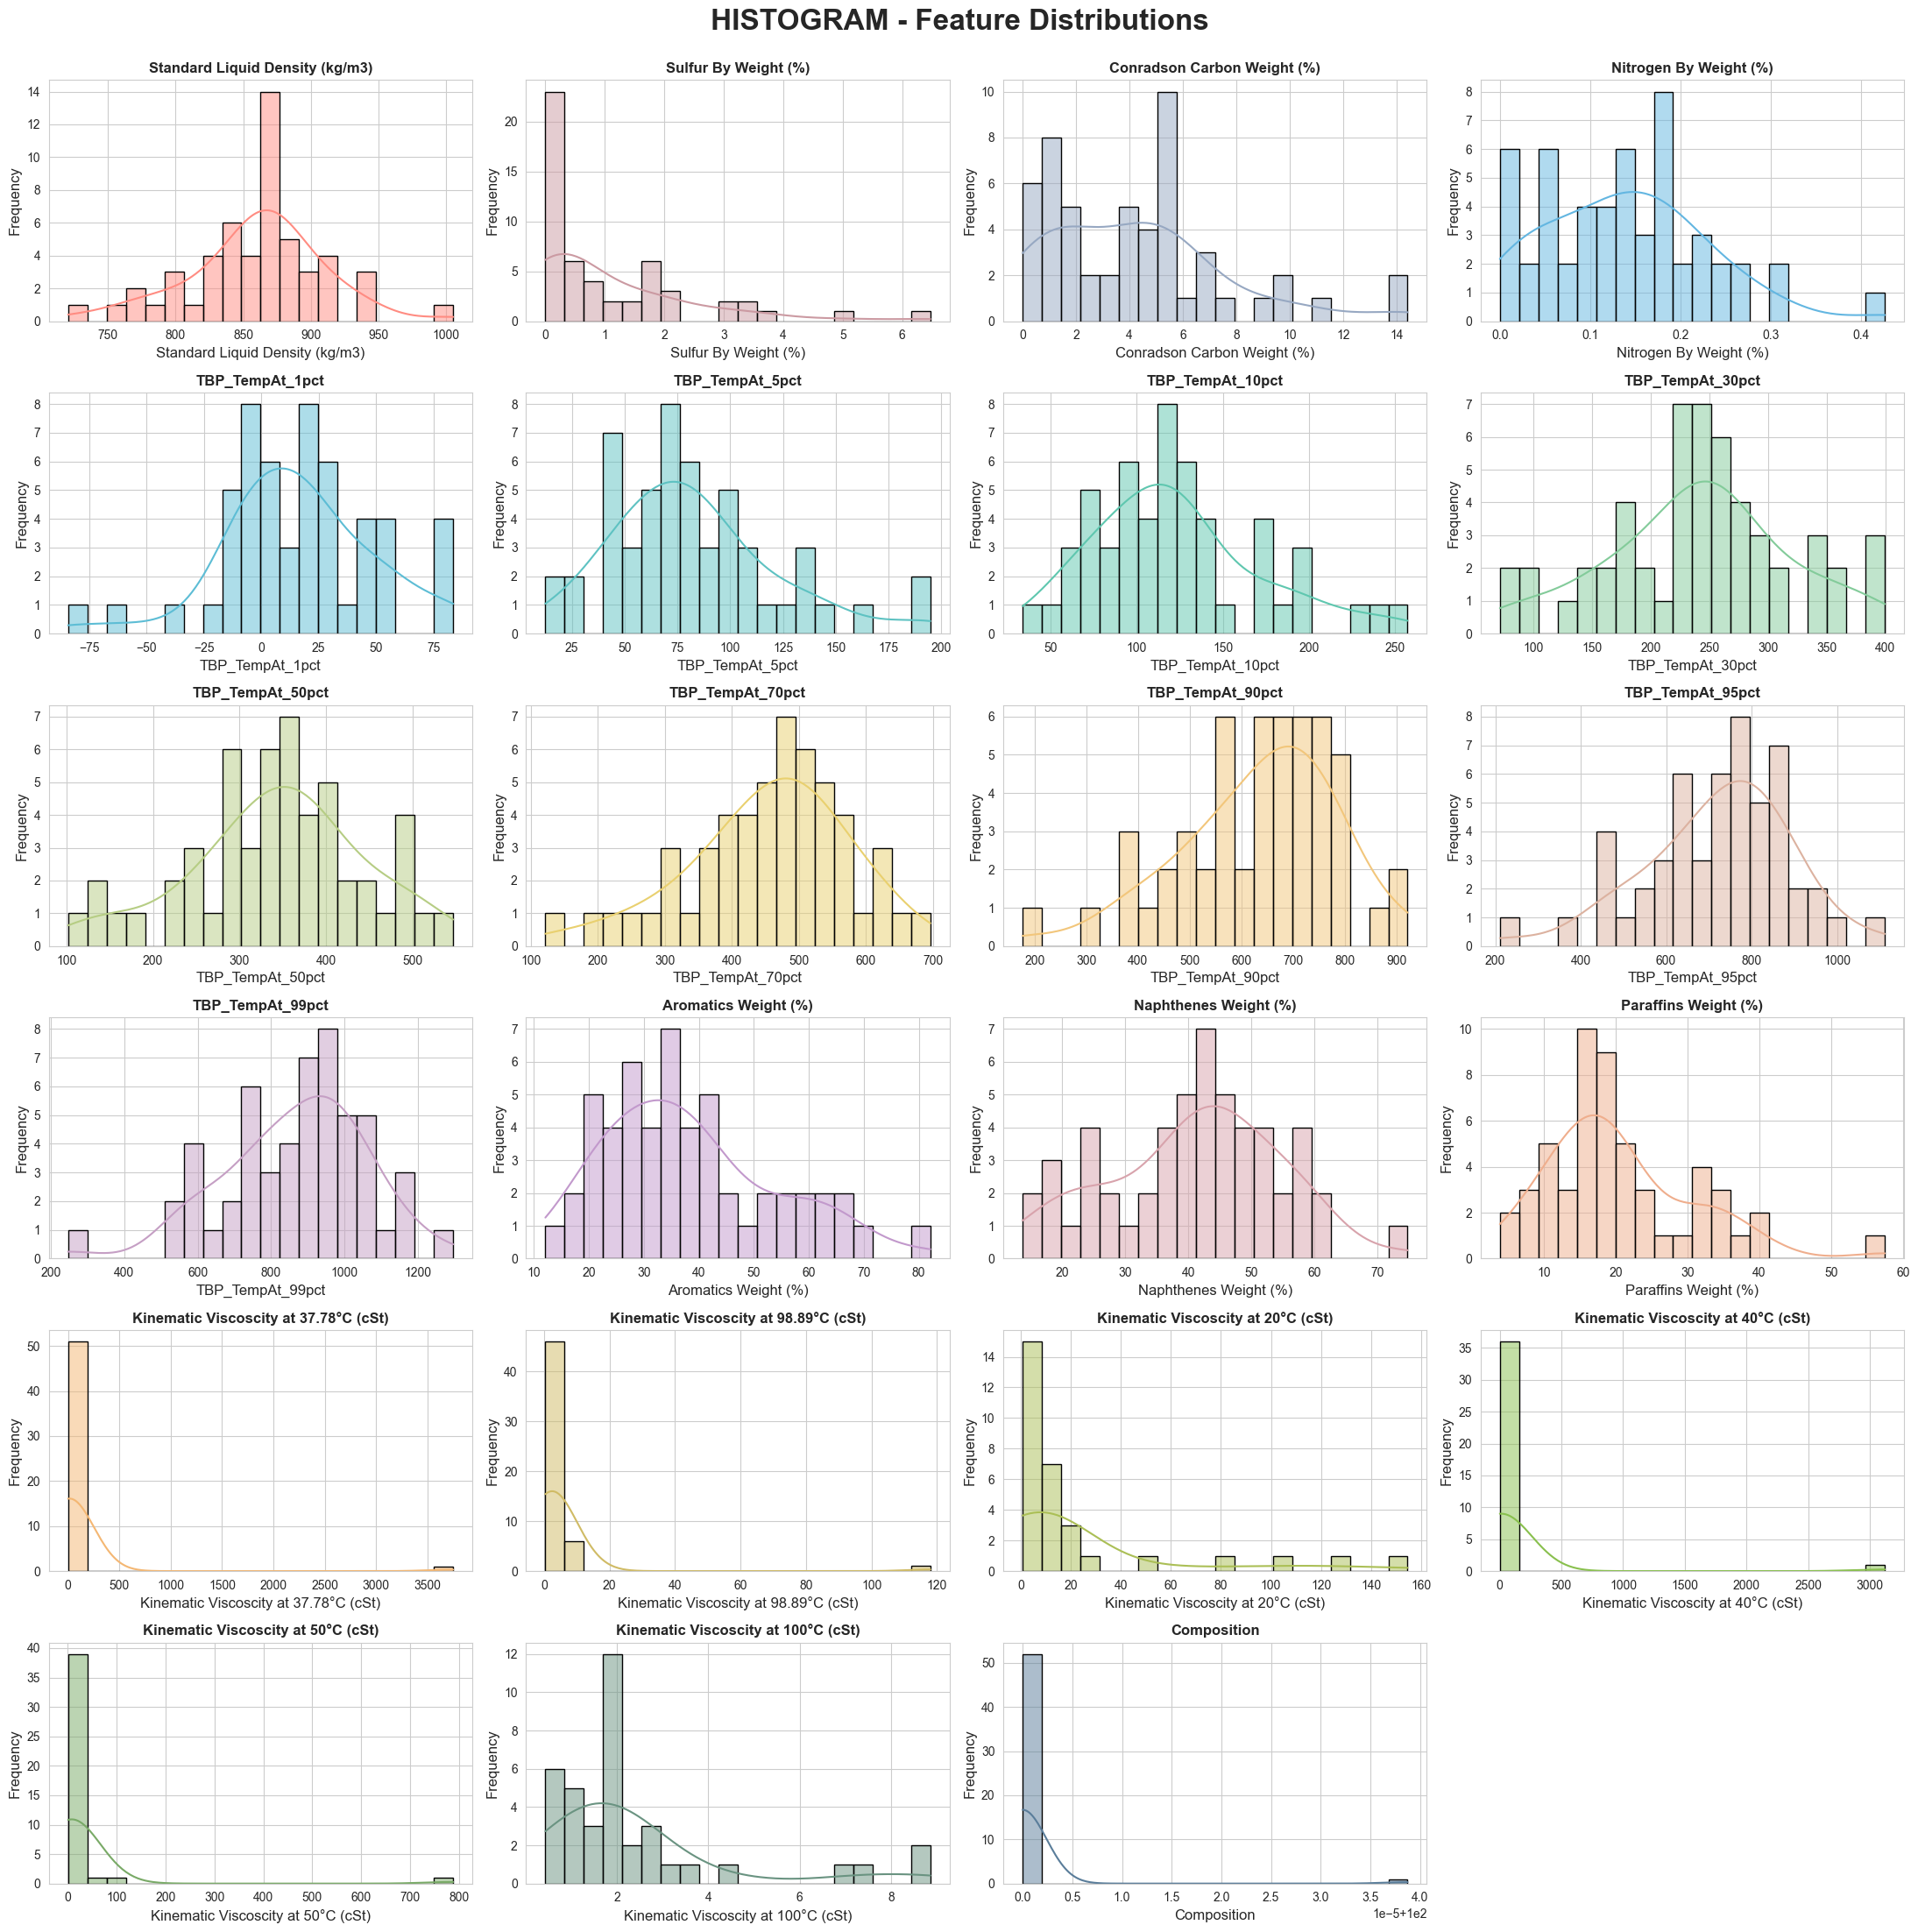

In [149]:
#Plotting Histograms for all features
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('KV_20c_cSt', '#abbf56', 'Kinematic Viscoscity at 20°C (cSt)'),
    ('KV_40c_cSt', '#89c04e', 'Kinematic Viscoscity at 40°C (cSt)'),
    ('KV_50c_cSt', '#79aa67', 'Kinematic Viscoscity at 50°C (cSt)'),
    ('KV_100c_cSt', '#6a9381', 'Kinematic Viscoscity at 100°C (cSt)'),
    ('Composition', '#5a7d9a', 'Composition')
]

sns.set_style("whitegrid")

fig, axes = plt.subplots(6, 4, figsize=(22, 22))
fig.suptitle("HISTOGRAM - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.histplot(df[col], bins=20, color=color, kde=True, ax=ax, edgecolor='black')
    ax.set_xlabel(title, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

- Sulfur & Viscosity: These are Right-Skewed (Positive Skew)
- TBP Temperatures: The temperatures at 30%, 50%, and 70% distillation are normally distributed, meaning the boiling points are consistent across most crudes


#### 4.1.2 Boxplot

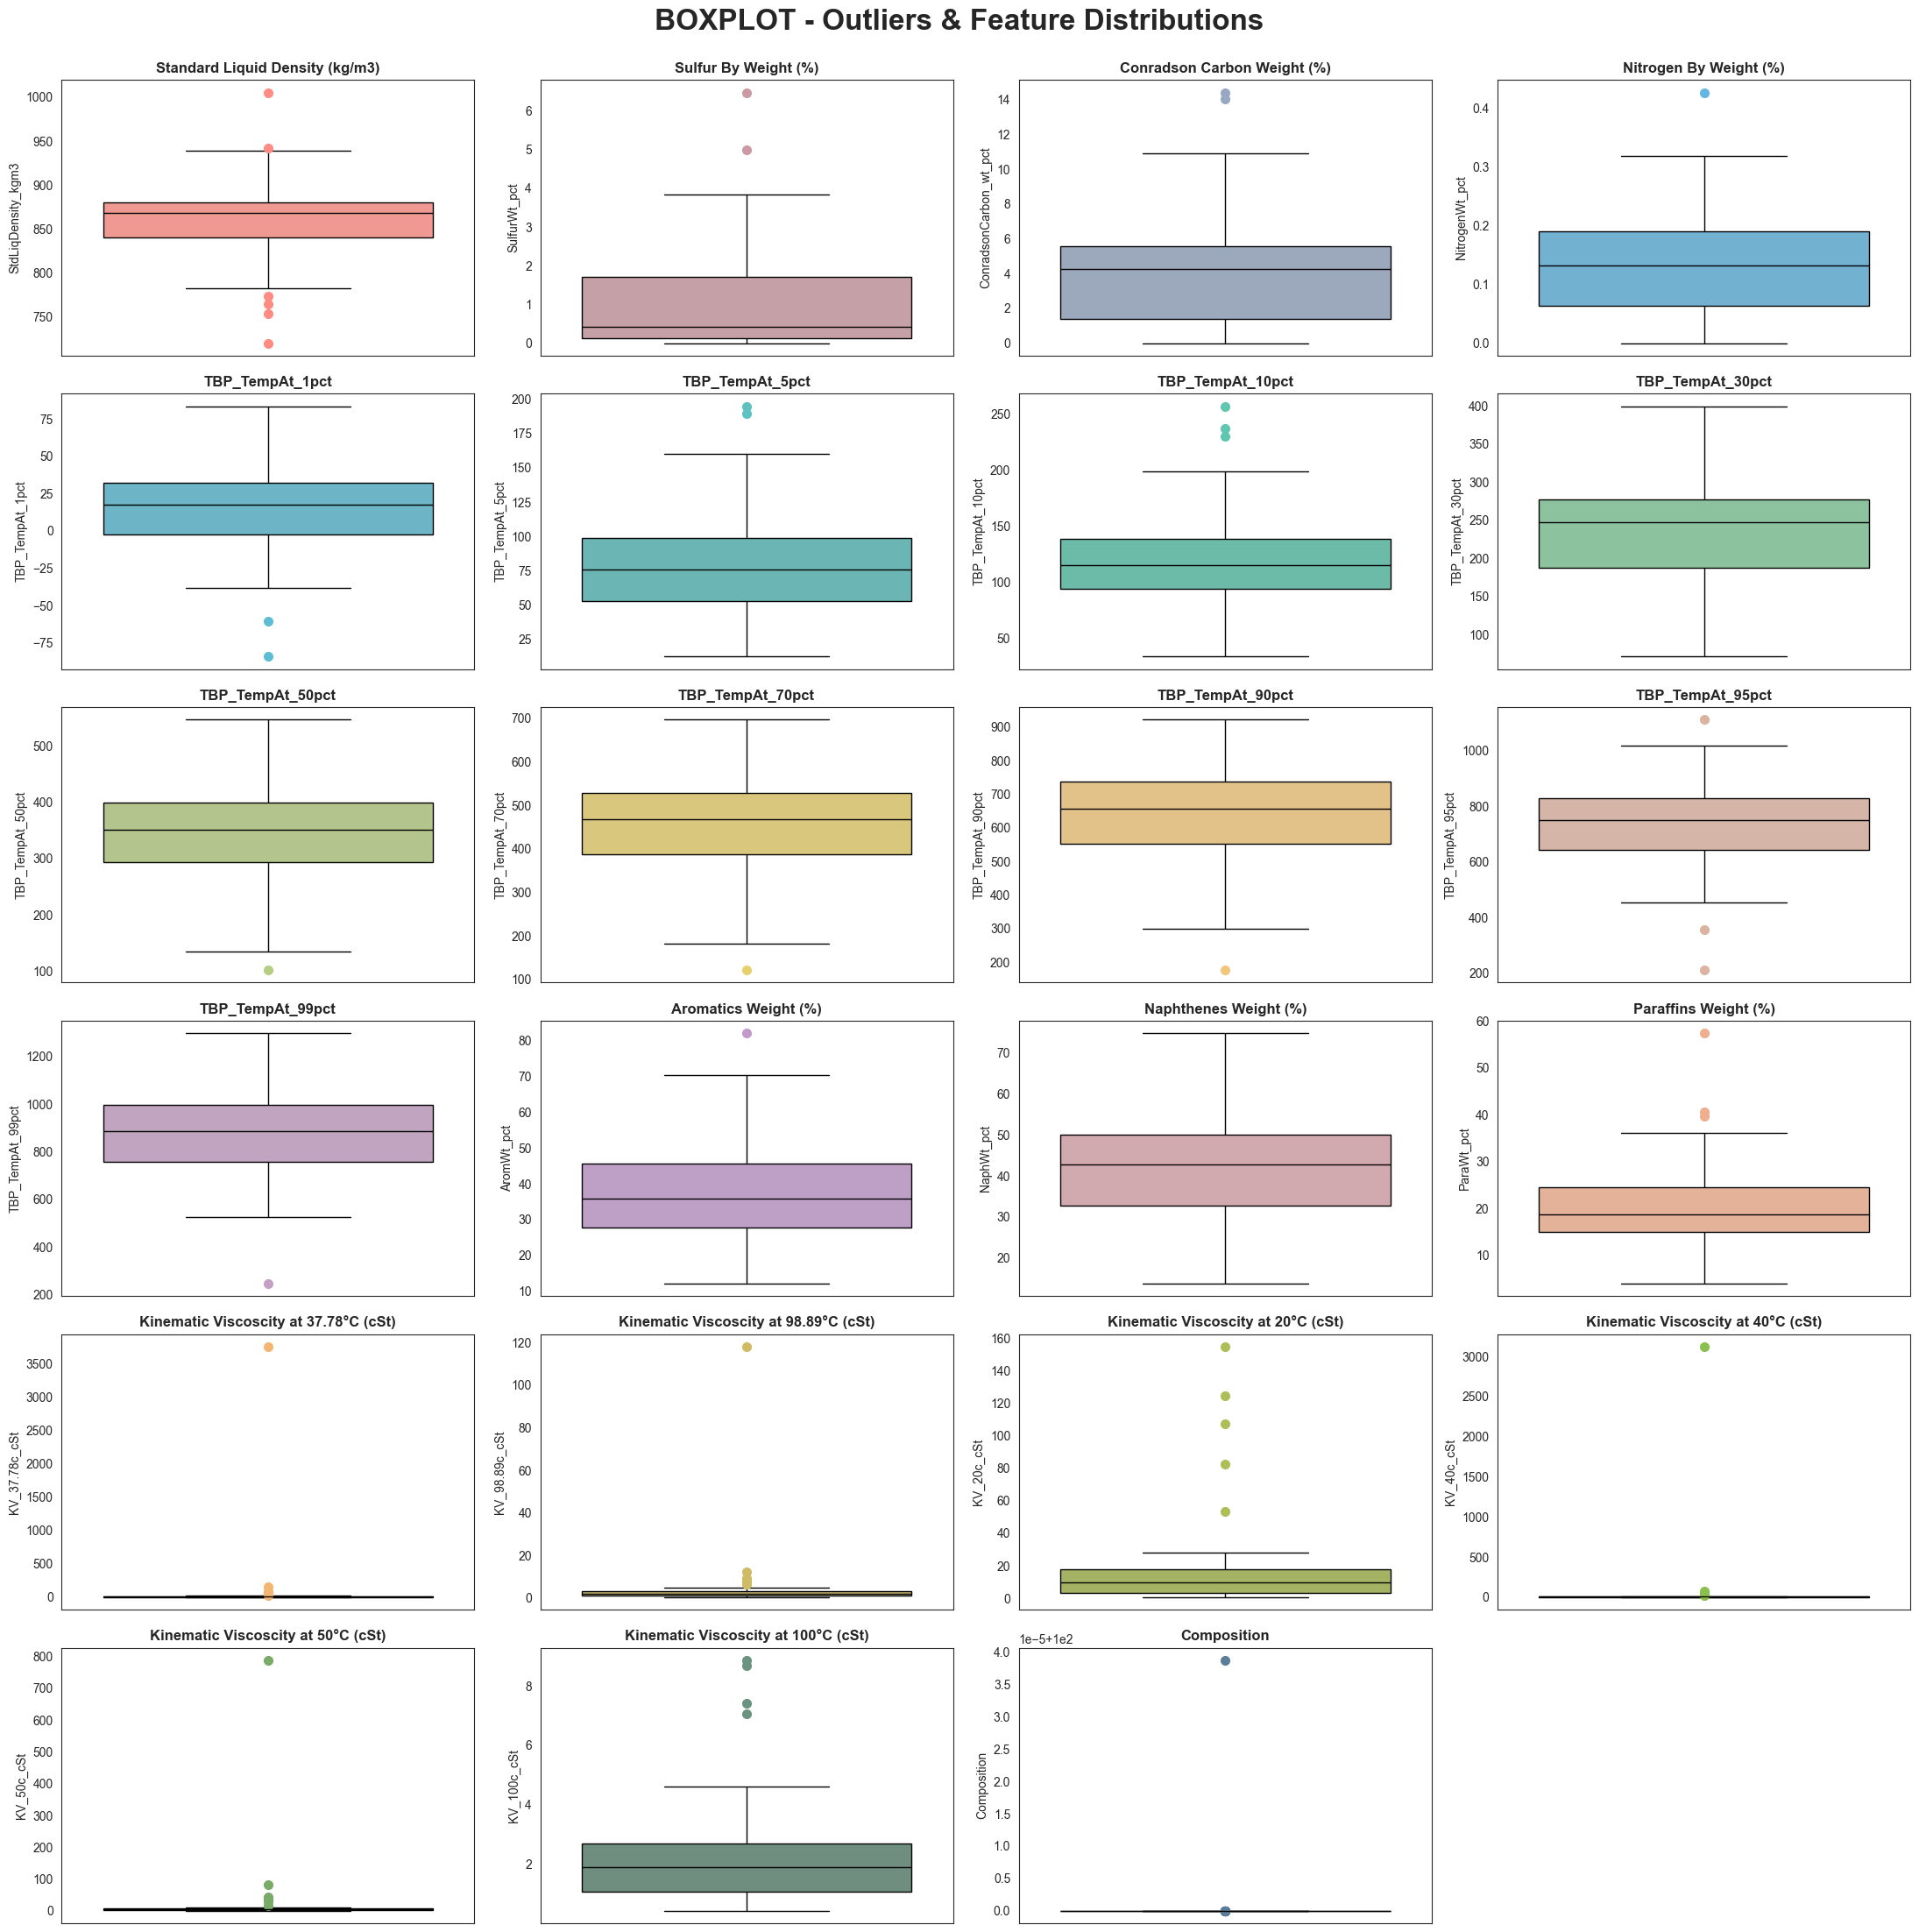

In [150]:
#Plotting Boxplot to detect outliers
sns.set_style("white")
columns = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', '#97a8c2', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', '#63b6e1', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_1pct', '#5dbdd5', 'TBP_TempAt_1pct'),
    ('TBP_TempAt_5pct', '#5ec2c2', 'TBP_TempAt_5pct'),
    ('TBP_TempAt_10pct', '#5fc7af', 'TBP_TempAt_10pct'),
    ('TBP_TempAt_30pct', '#83cb9a', 'TBP_TempAt_30pct'),
    ('TBP_TempAt_50pct', '#b6cd84', 'TBP_TempAt_50pct'),
    ('TBP_TempAt_70pct', '#e9d06f', 'TBP_TempAt_70pct'),
    ('TBP_TempAt_90pct', '#f2c67b', 'TBP_TempAt_90pct'),
    ('TBP_TempAt_95pct', '#dcb2a0', 'TBP_TempAt_95pct'),
    ('TBP_TempAt_99pct', '#c59fc4', 'TBP_TempAt_99pct'),
    ('AromWt_pct', '#c299cc', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#d8a3ac', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#efae8d', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
    ('KV_20c_cSt', '#abbf56', 'Kinematic Viscoscity at 20°C (cSt)'),
    ('KV_40c_cSt', '#89c04e', 'Kinematic Viscoscity at 40°C (cSt)'),
    ('KV_50c_cSt', '#79aa67', 'Kinematic Viscoscity at 50°C (cSt)'),
    ('KV_100c_cSt', '#6a9381', 'Kinematic Viscoscity at 100°C (cSt)'),
    ('Composition', '#5a7d9a', 'Composition')
]

fig, axes = plt.subplots(6, 4, figsize=(22, 22))
fig.suptitle("BOXPLOT - Outliers & Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(columns):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, columns):
    sns.boxplot(df[col],color=color, boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black'), 
                capprops=dict(color='black'), medianprops=dict(color='black'), flierprops=dict(markerfacecolor=color,
                markeredgecolor=color, markersize=7), ax=ax)
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
plt.tight_layout()
plt.show()

- Viscosity is extreme
- Density is stable
- Naphthenes are consistent

#### 4.1.3 Violin Plots

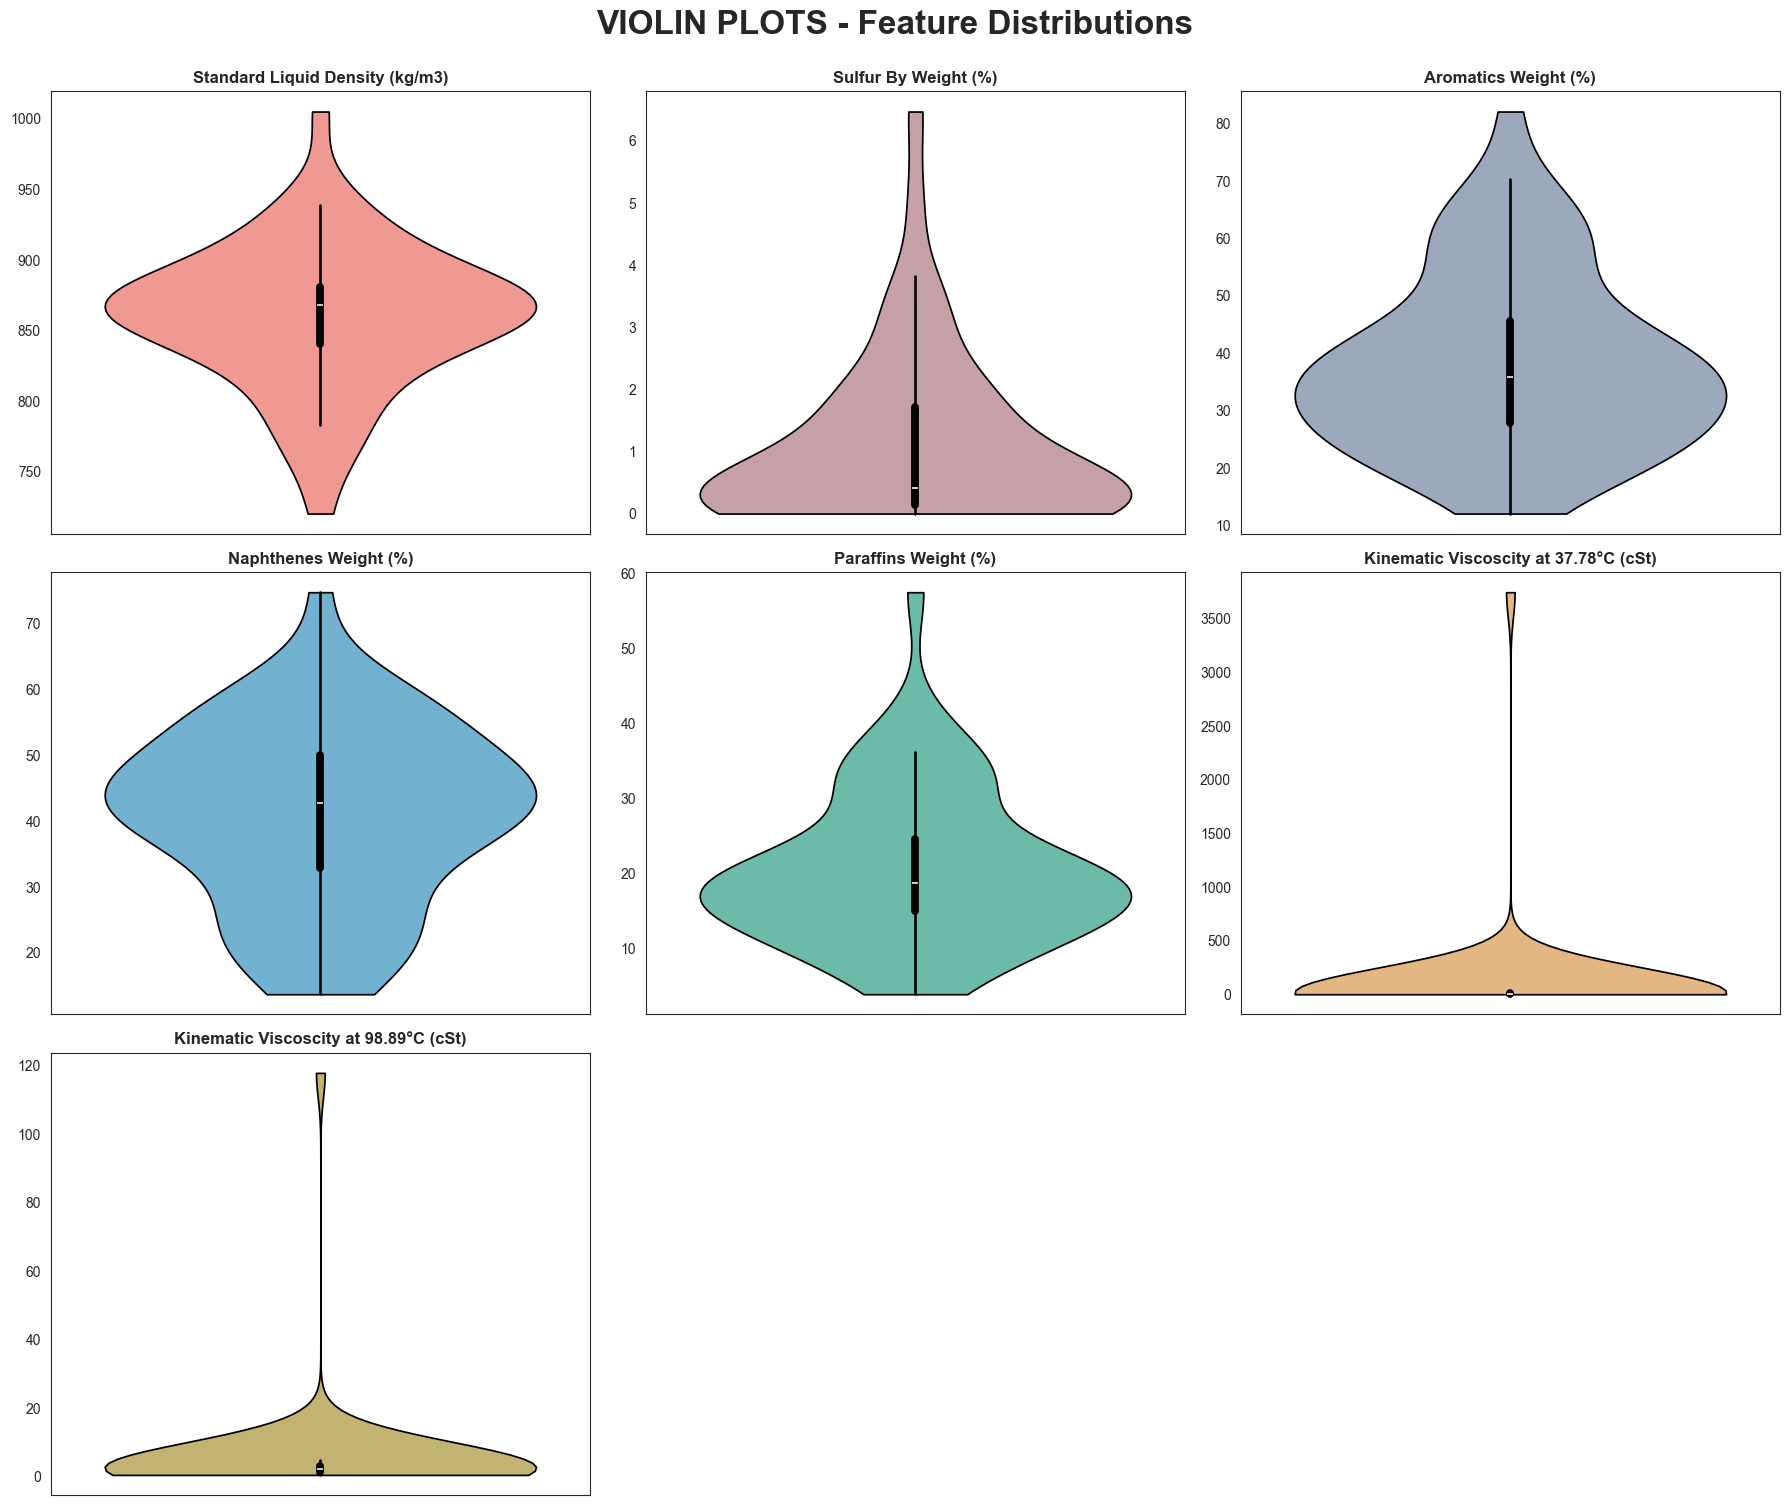

In [151]:
sns.set_style("white")

violin_cols = [
    ('StdLiqDensity_kgm3', '#ff8c82', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', '#cb9aa2', 'Sulfur By Weight (%)'),
    ('AromWt_pct','#97a8c2', 'Aromatics Weight (%)'),
    ('NaphWt_pct', '#63b6e1', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', '#5fc7af', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', '#f4b773', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', '#d0bb65', 'Kinematic Viscoscity at 98.89°C (cSt)'),
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("VIOLIN PLOTS - Feature Distributions", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(violin_cols):]:
    ax.axis('off')

for ax, (col, color, title) in zip(axes, violin_cols):
    sns.violinplot(df[col],color=color, inner="box", cut=0, ax=ax, edgecolor='black')
    ax.set_title(f"{title}", fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()


#### 4.1.4 QQ Plot - Normality Assessment

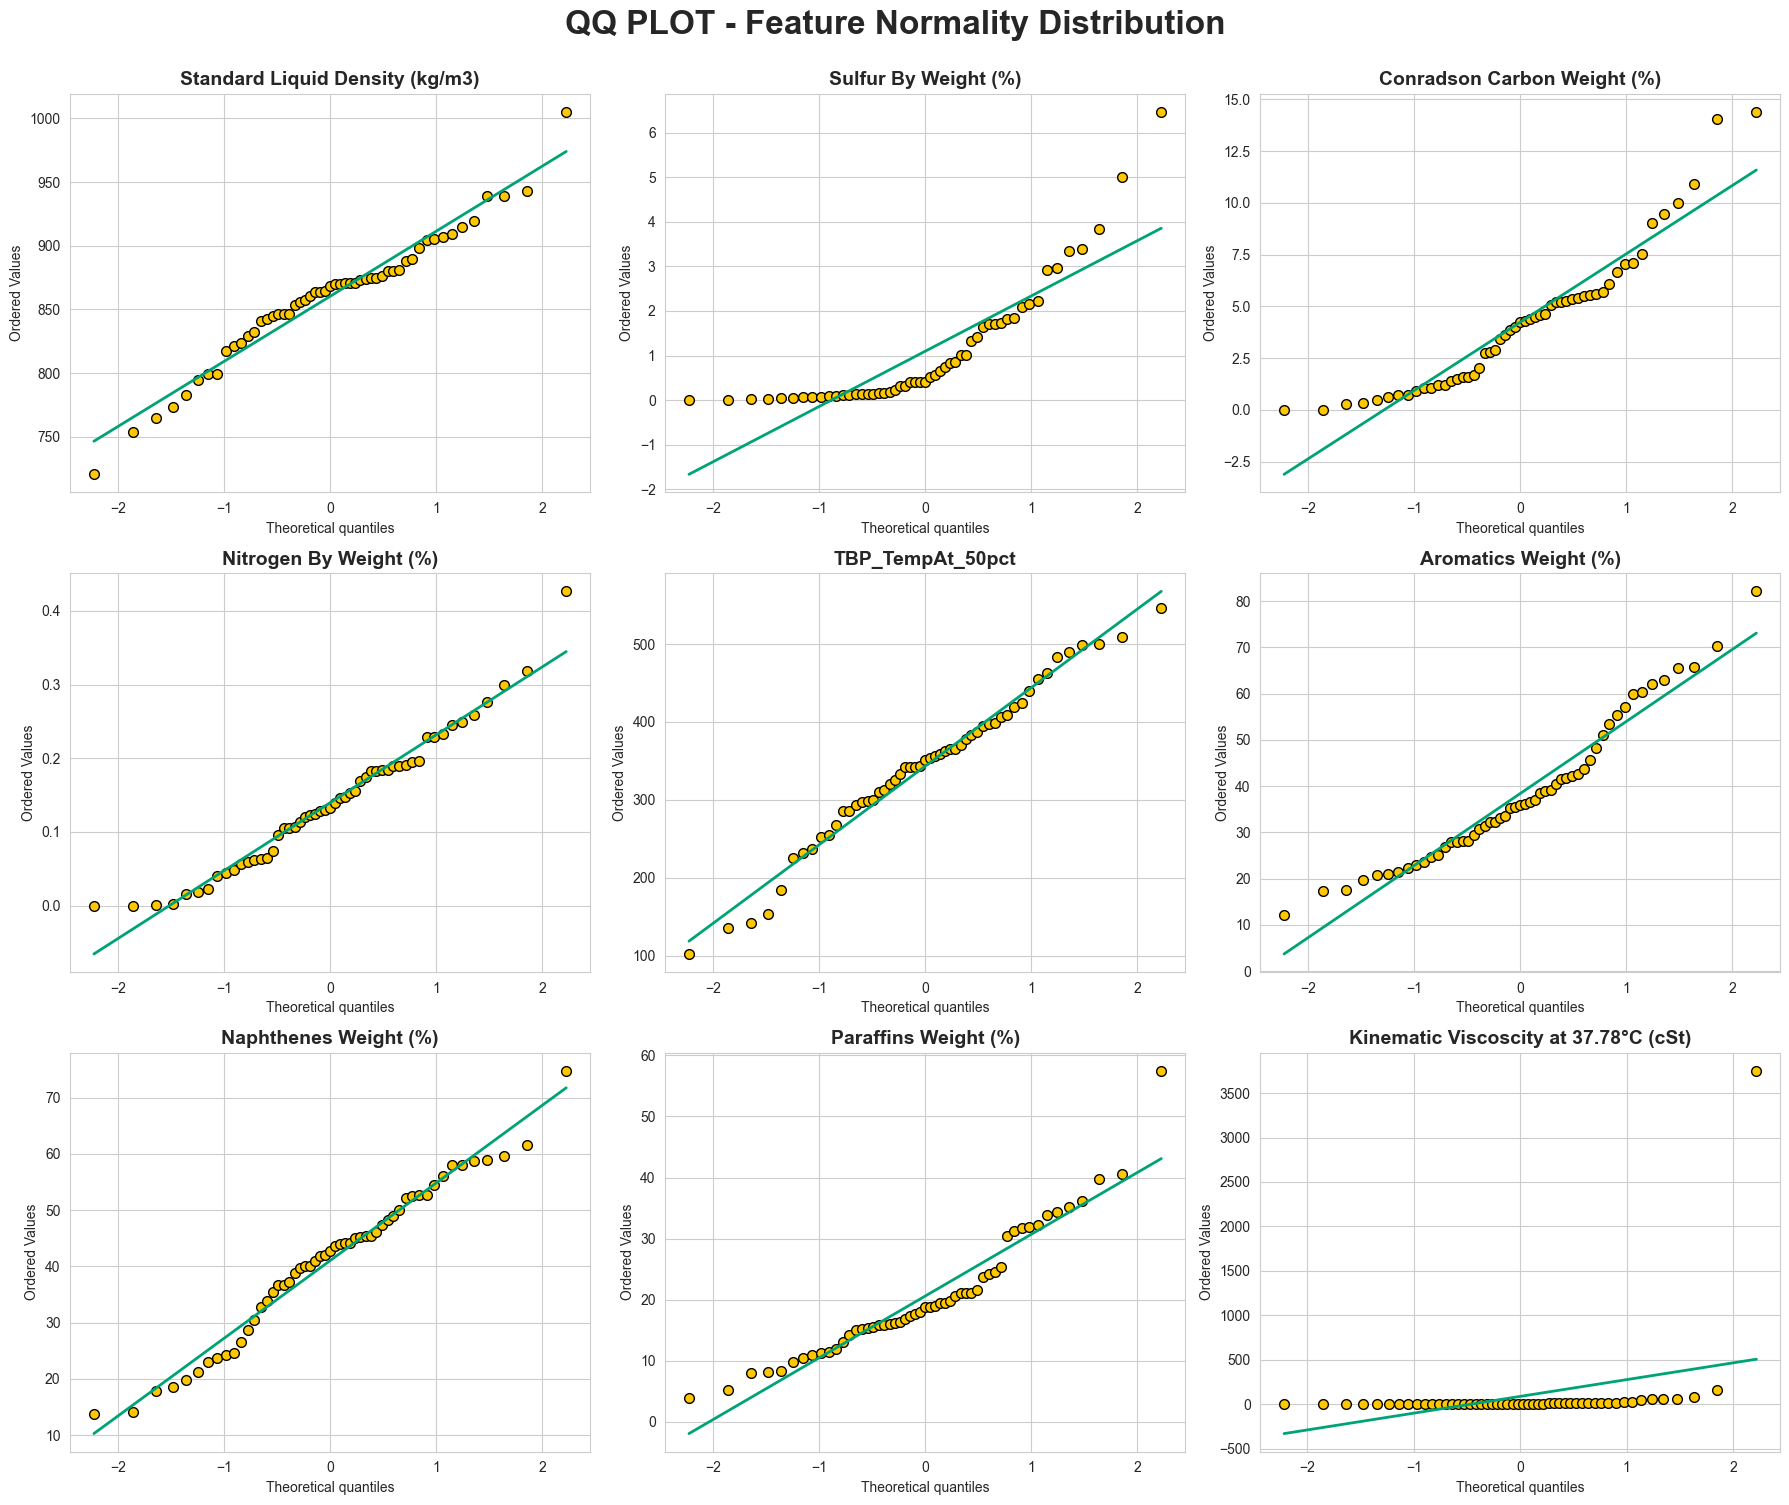

In [152]:
#Plotting QQ Plot to detect outliers
sns.set_style("whitegrid")

qq = [
    ('StdLiqDensity_kgm3', 'Standard Liquid Density (kg/m3)'),
    ('SulfurWt_pct', 'Sulfur By Weight (%)'),
    ('ConradsonCarbon_wt_pct', 'Conradson Carbon Weight (%)'),
    ('NitrogenWt_pct', 'Nitrogen By Weight (%)'),
    ('TBP_TempAt_50pct', 'TBP_TempAt_50pct'),
    ('AromWt_pct', 'Aromatics Weight (%)'),
    ('NaphWt_pct', 'Naphthenes Weight (%)'),
    ('ParaWt_pct', 'Paraffins Weight (%)'),
    ('KV_37.78c_cSt', 'Kinematic Viscoscity at 37.78°C (cSt)'),
    ('KV_98.89c_cSt', 'Kinematic Viscoscity at 98.89°C (cSt)'),
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle("QQ PLOT - Feature Normality Distribution", fontsize=24, fontweight="bold",y=1)
axes = axes.flatten()
for ax in axes[len(qq):]:
    ax.axis('off')

for ax, (col, title) in zip(axes, qq):
    stats.probplot(df[col].dropna(), dist="norm", plot=ax)

    lines = ax.get_lines()
    lines[1].set_color("#00A375")
    lines[1].set_linewidth(2)

    lines[0].set_markerfacecolor('#FFC700')
    lines[0].set_markeredgecolor("black")
    lines[0].set_markersize(7)

    ax.set_title(title, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

### 4.2 BIVARIATE ANALYSIS
#### 4.2.1 Scatter Plots - Independent Variables vs Output Set 1 

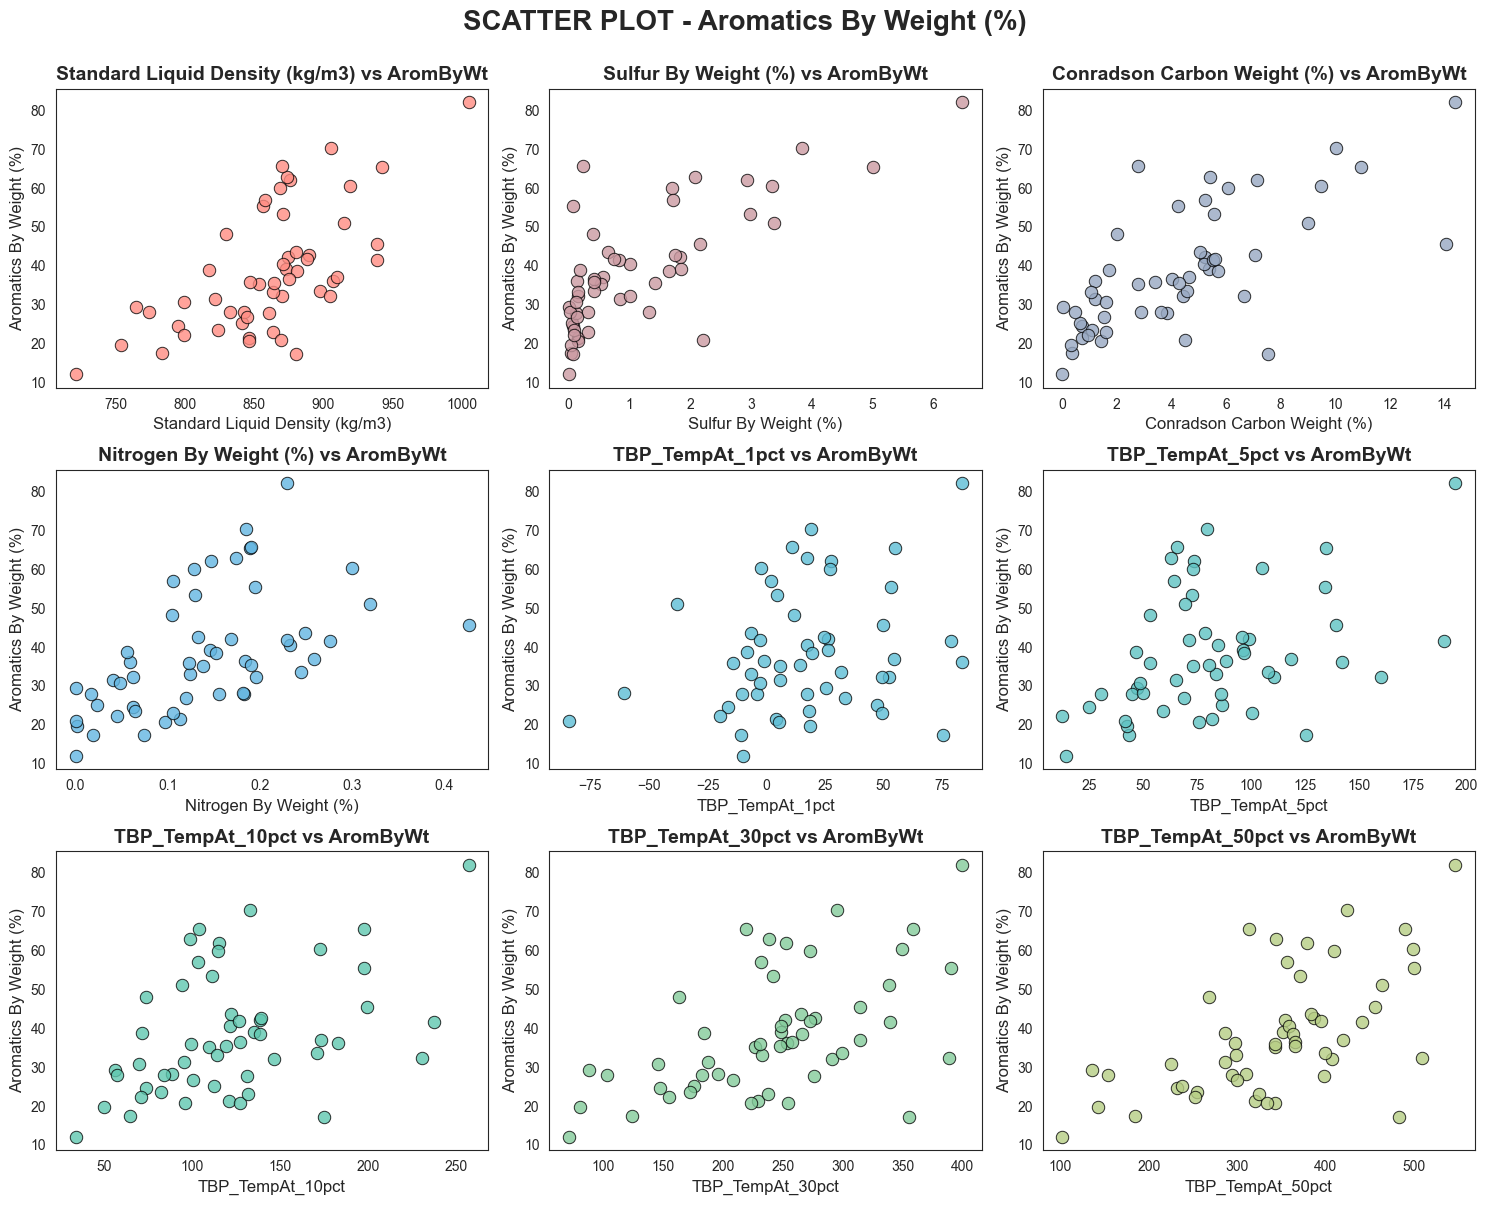

In [153]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['AromWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Aromatics By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Aromatics By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs AromByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

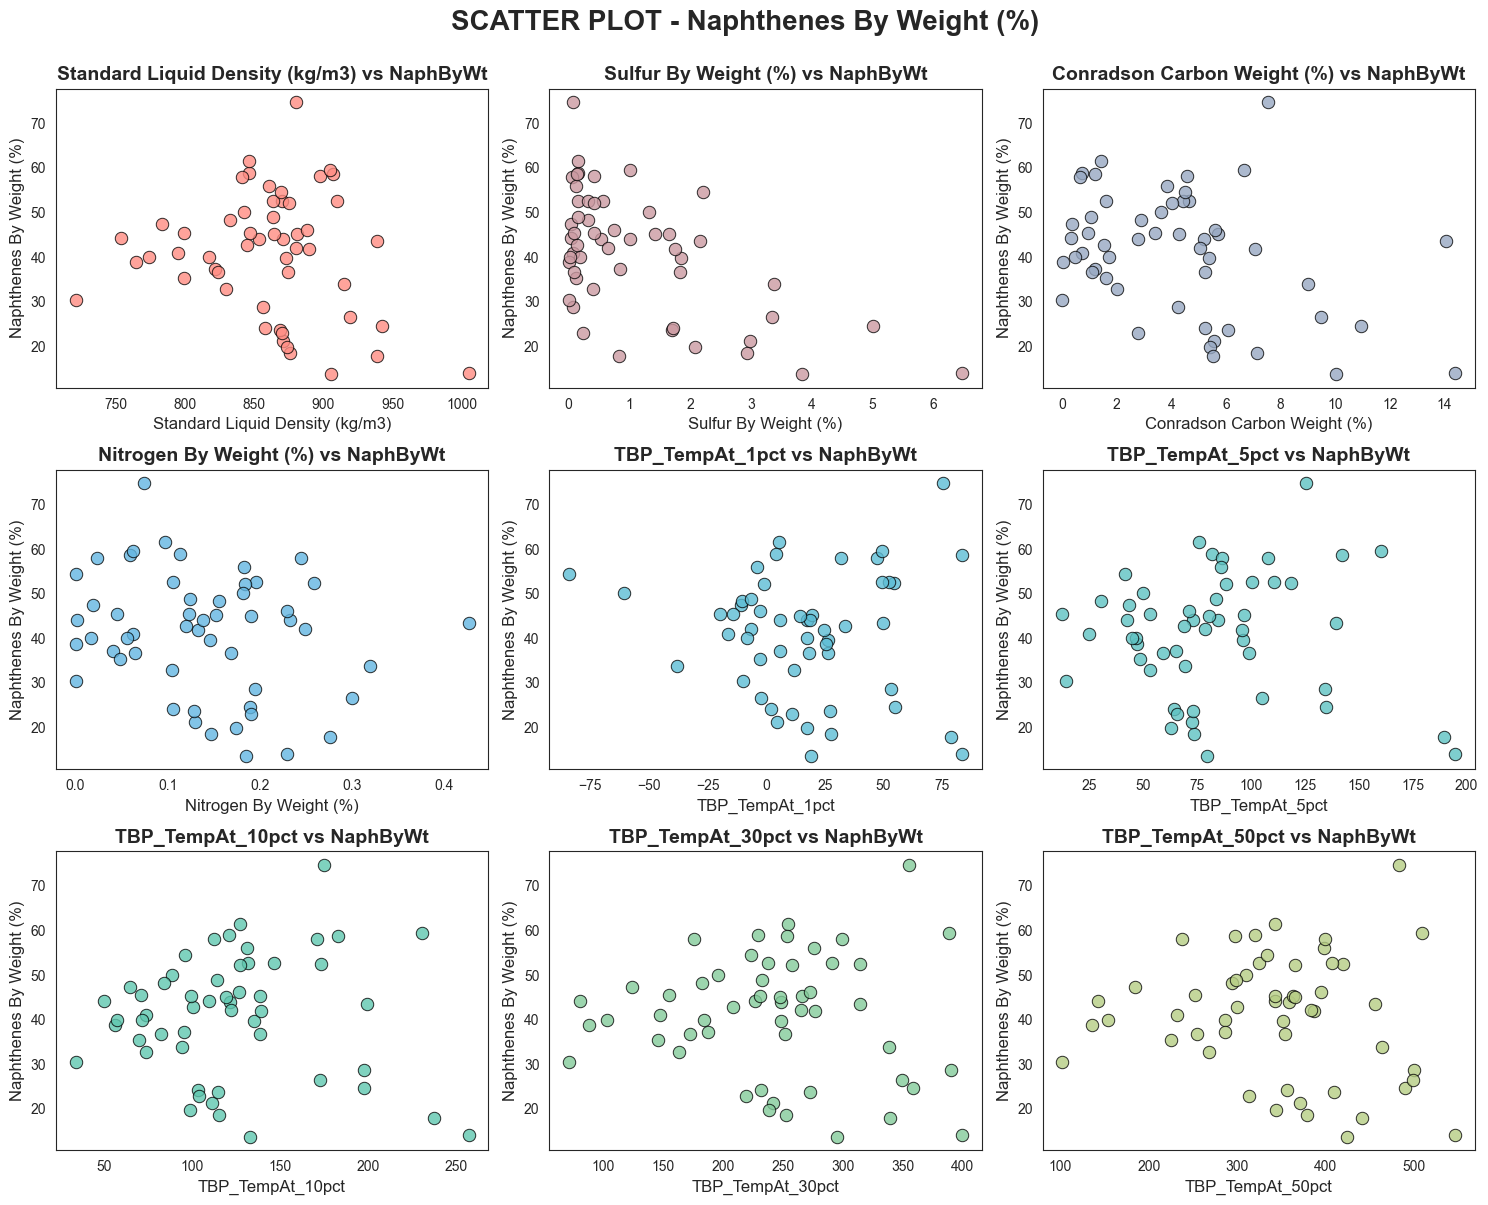

In [154]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['NaphWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Naphthenes By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Naphthenes By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs NaphByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

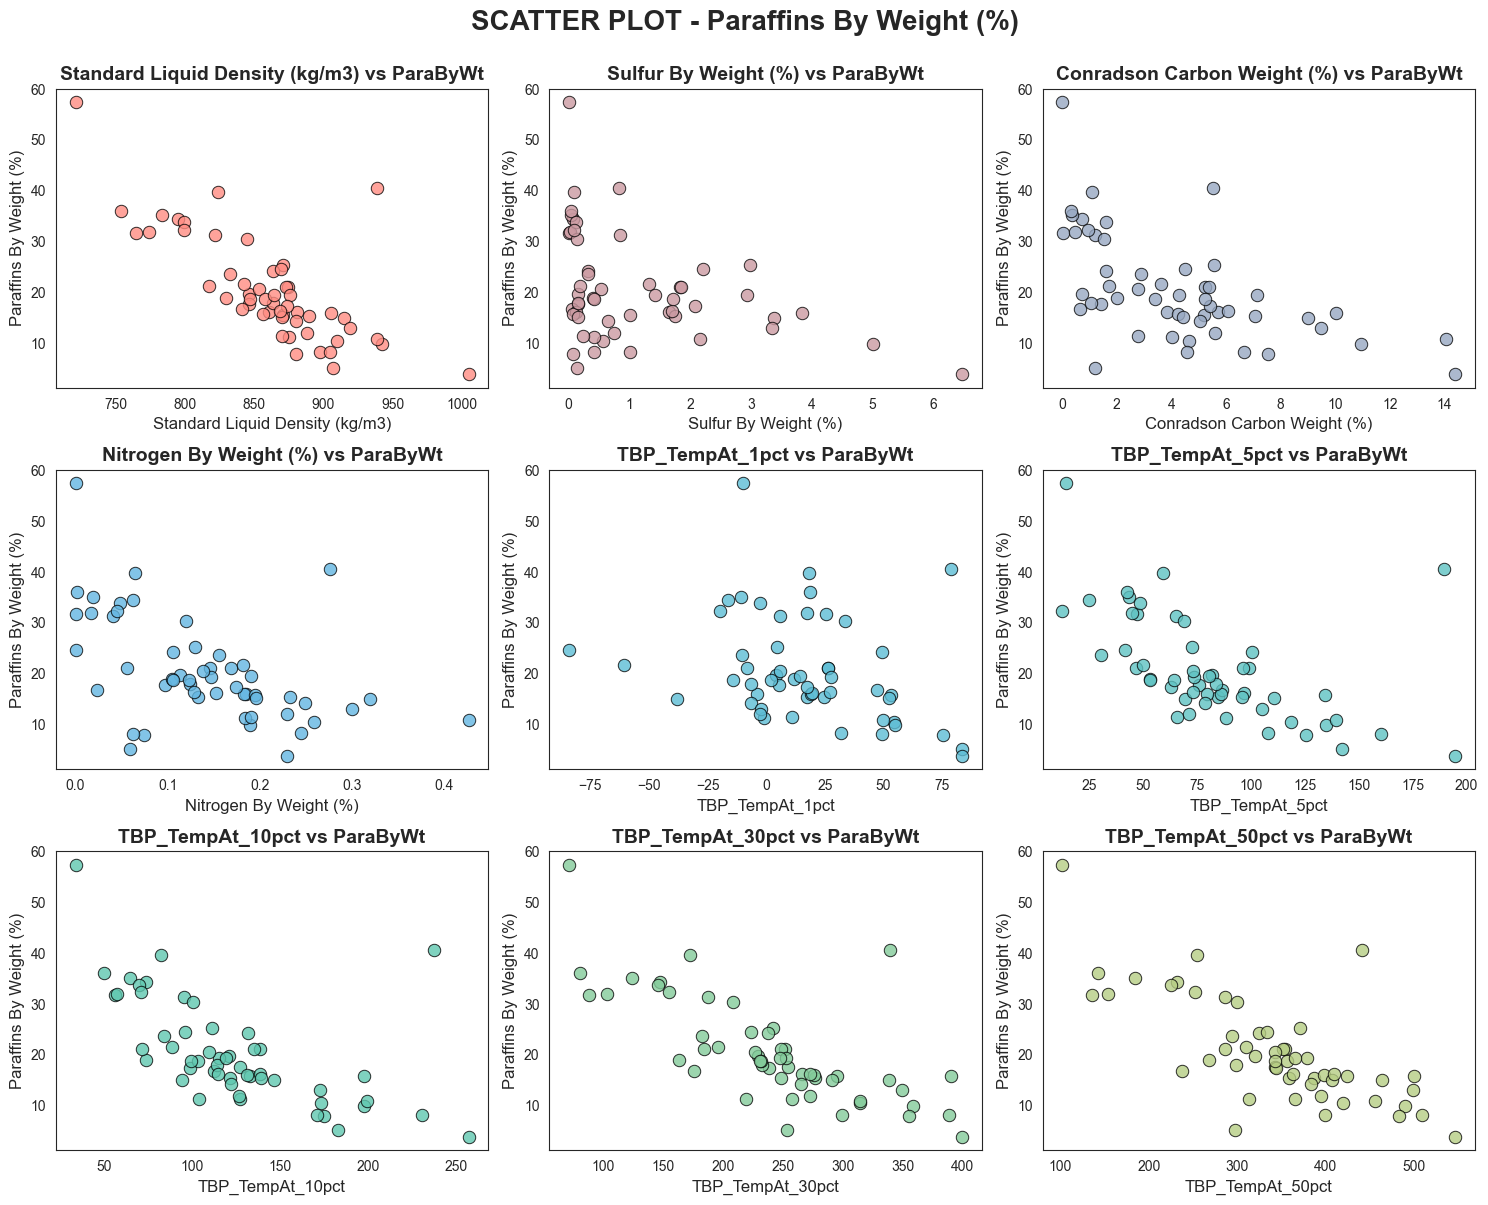

In [155]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['ParaWt_pct']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Paraffins By Weight (%)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Paraffins By Weight (%)', fontsize=12)
    ax.set_title(f'{title} vs ParaByWt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.2 Scatter Plots - Independent Variables vs Output Set 2

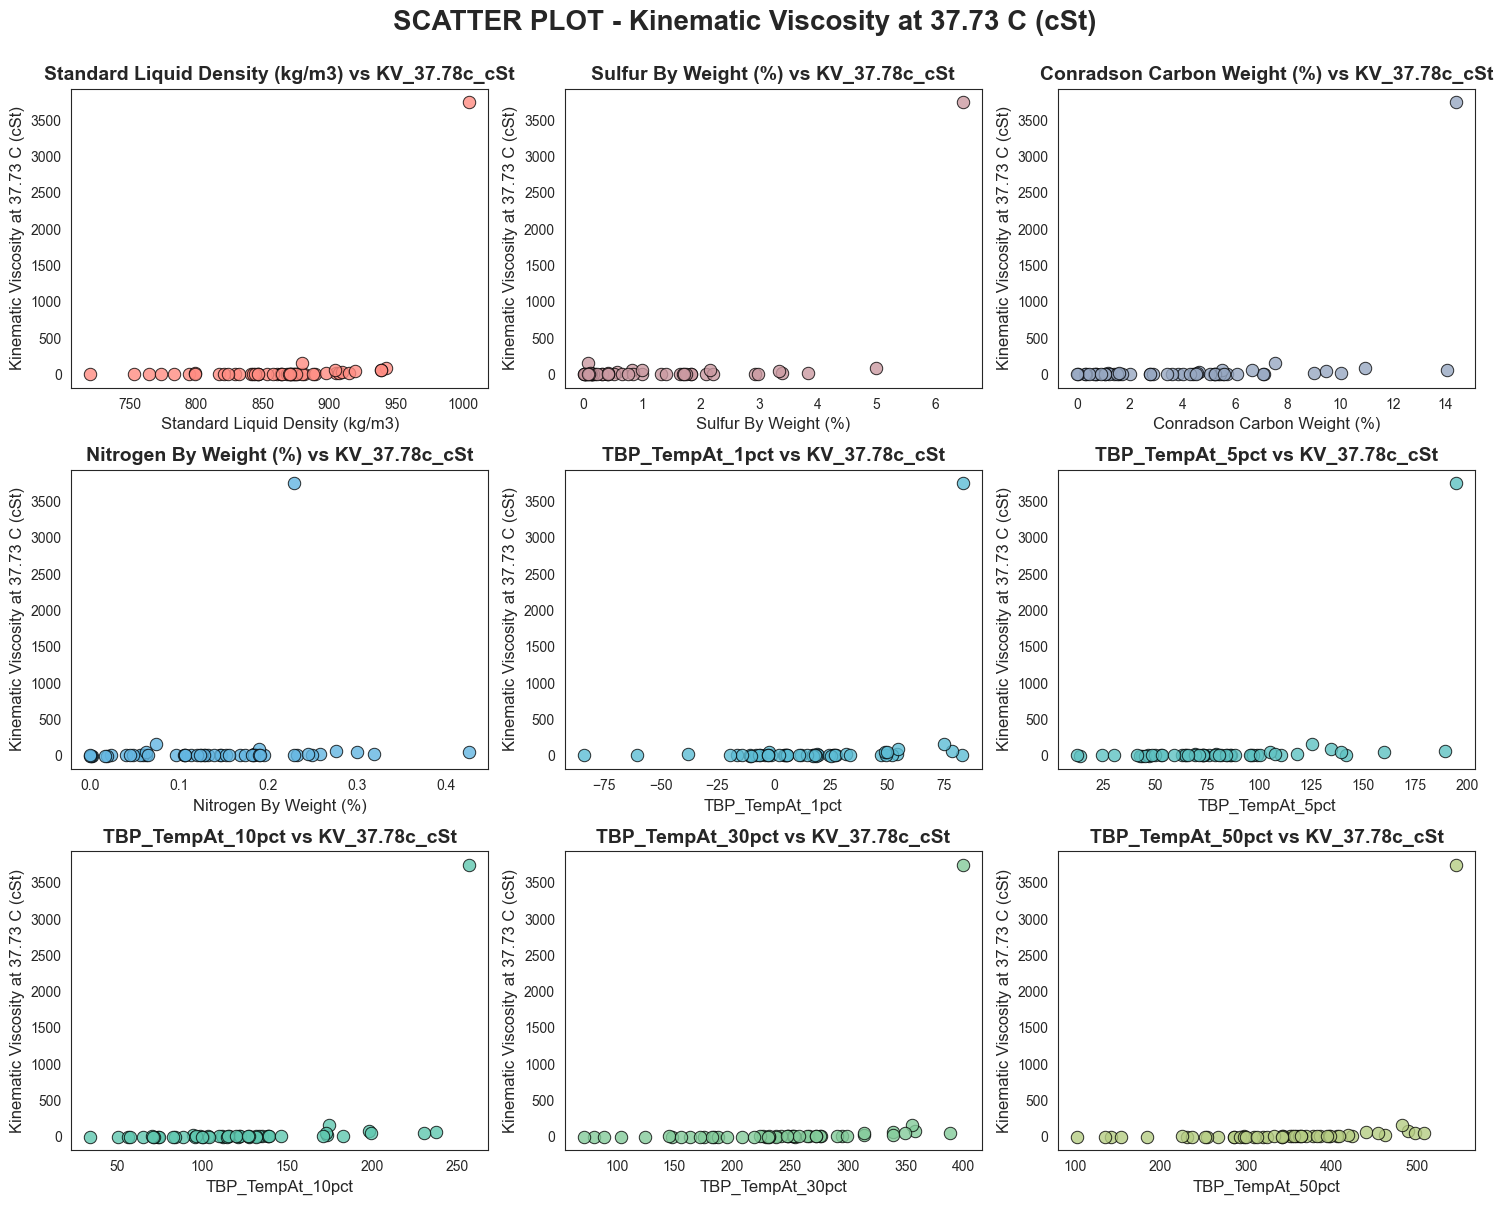

In [156]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['KV_37.78c_cSt']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 37.73 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Kinematic Viscosity at 37.73 C (cSt)', fontsize=12)
    ax.set_title(f'{title} vs KV_37.78c_cSt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

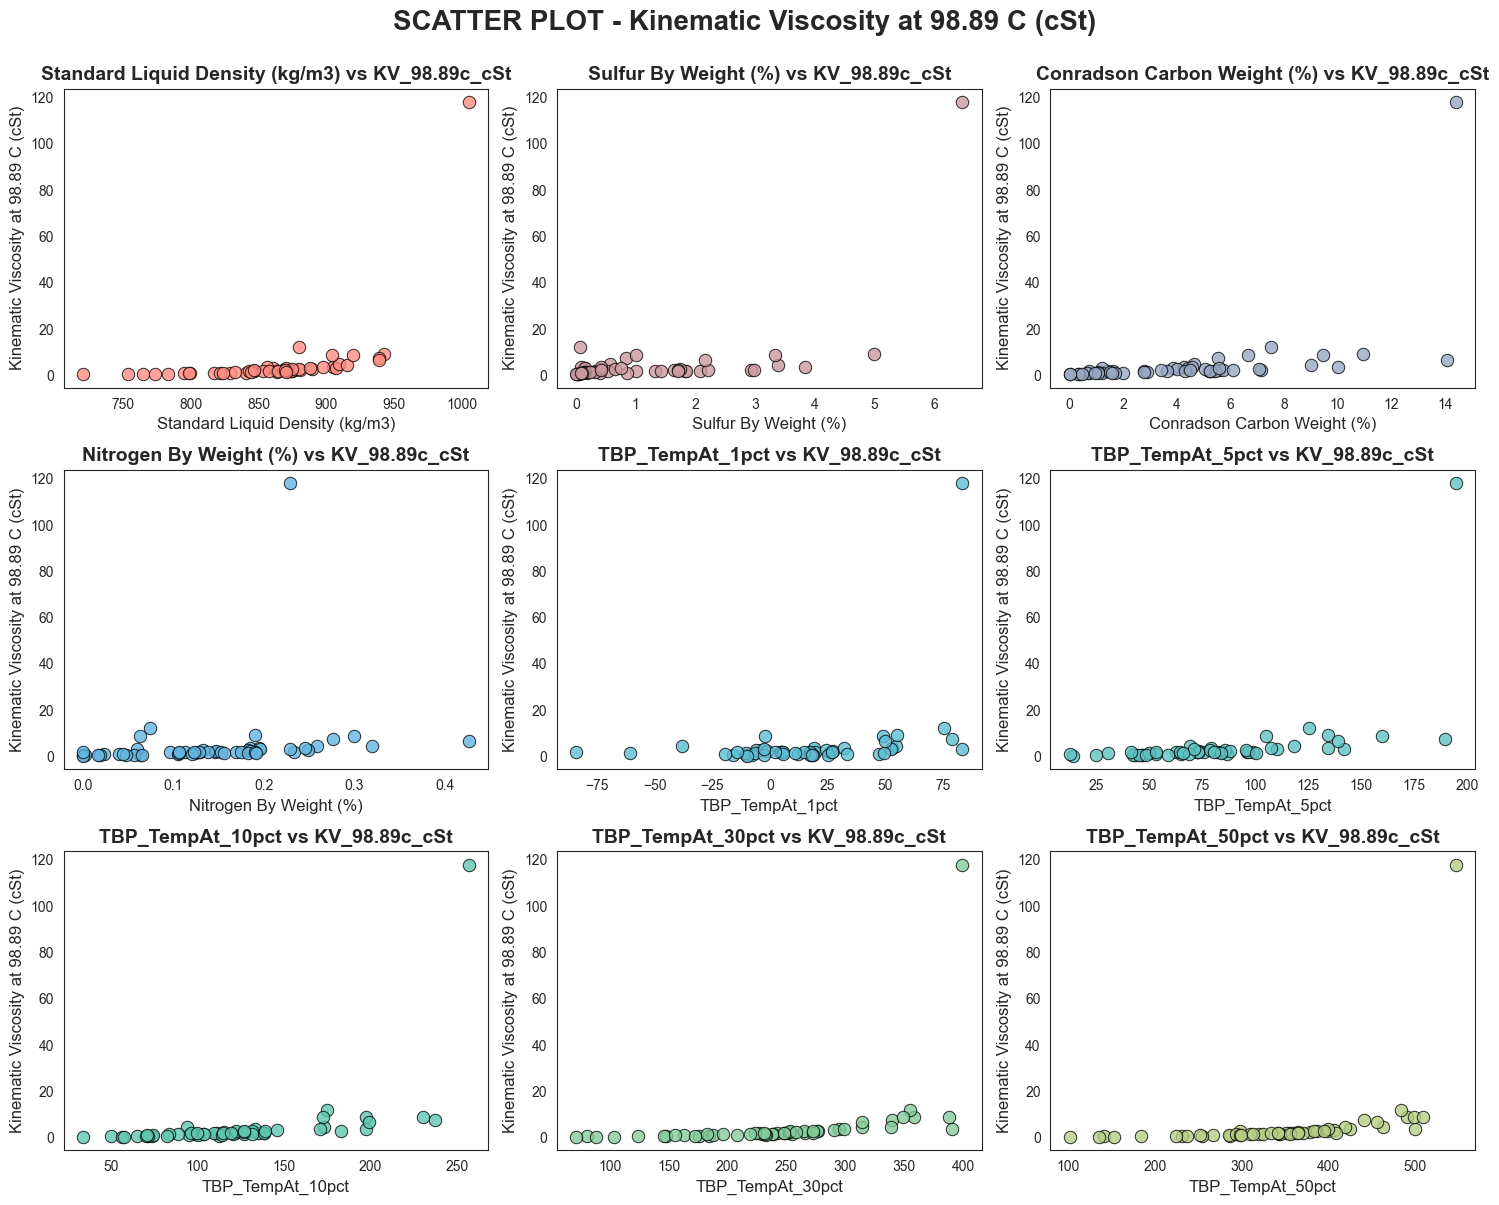

In [157]:
features=['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct',
          'TBP_TempAt_10pct', 'TBP_TempAt_50pct','TBP_TempAt_90pct']

output=['KV_98.89c_cSt']
sns.set_style("white")       
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("SCATTER PLOT - Kinematic Viscosity at 98.89 C (cSt)", fontsize=20, fontweight="bold",y=1)
axes = axes.flatten()

for ax, (col, color, title) in zip(axes, columns):
    sns.scatterplot(x=df[col].squeeze(), y=df[output].squeeze(), ax=ax, color=color, edgecolors='black', s=80, alpha=0.8)
    ax.set_xlabel(title, fontsize=12)           
    ax.set_ylabel('Kinematic Viscosity at 98.89 C (cSt)', fontsize=12)
    ax.set_title(f'{title} vs KV_98.89c_cSt', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 4.2.3 Stacked Bar Chart - Composition Analysis

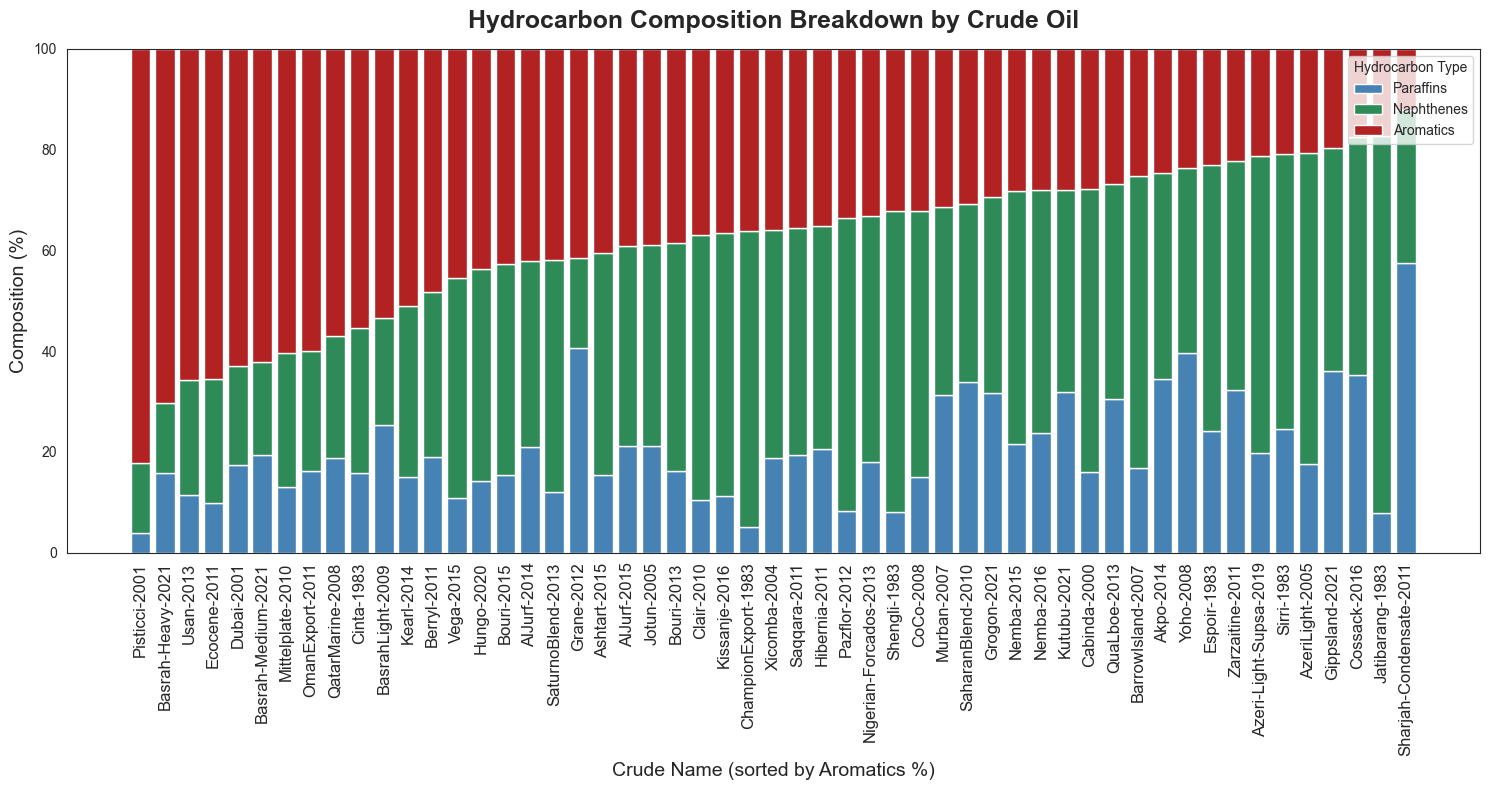

In [158]:
sns.set_style("white")

df_sorted = df.sort_values(by="AromWt_pct", ascending=False).reset_index(drop=True)
crude_names = df_sorted["Crude_Name"]

para = df_sorted["ParaWt_pct"]
naph = df_sorted["NaphWt_pct"]
arom = df_sorted["AromWt_pct"]
plt.figure(figsize=(15, 8))

plt.bar(crude_names, para, label="Paraffins", color="steelblue")
plt.bar(crude_names, naph, bottom=para, label="Naphthenes", color="seagreen")
plt.bar(crude_names, arom, bottom=para + naph, label="Aromatics", color="firebrick")
plt.ylabel("Composition (%)", fontsize=14)
plt.xlabel("Crude Name (sorted by Aromatics %)", fontsize=14)
plt.title( "Hydrocarbon Composition Breakdown by Crude Oil", fontsize=18, fontweight="bold", pad=15)

plt.ylim(0, 100)
plt.xticks(rotation=90, fontsize=12)
plt.legend(title="Hydrocarbon Type", loc="upper right")
plt.tight_layout()
plt.show()


### 4.3 MULTIVARIATE ANALYSIS
#### 4.3.1 Pairwise Relationships

Text(0.5, 1.02, 'PAIRPLOT - Feature Relationships')

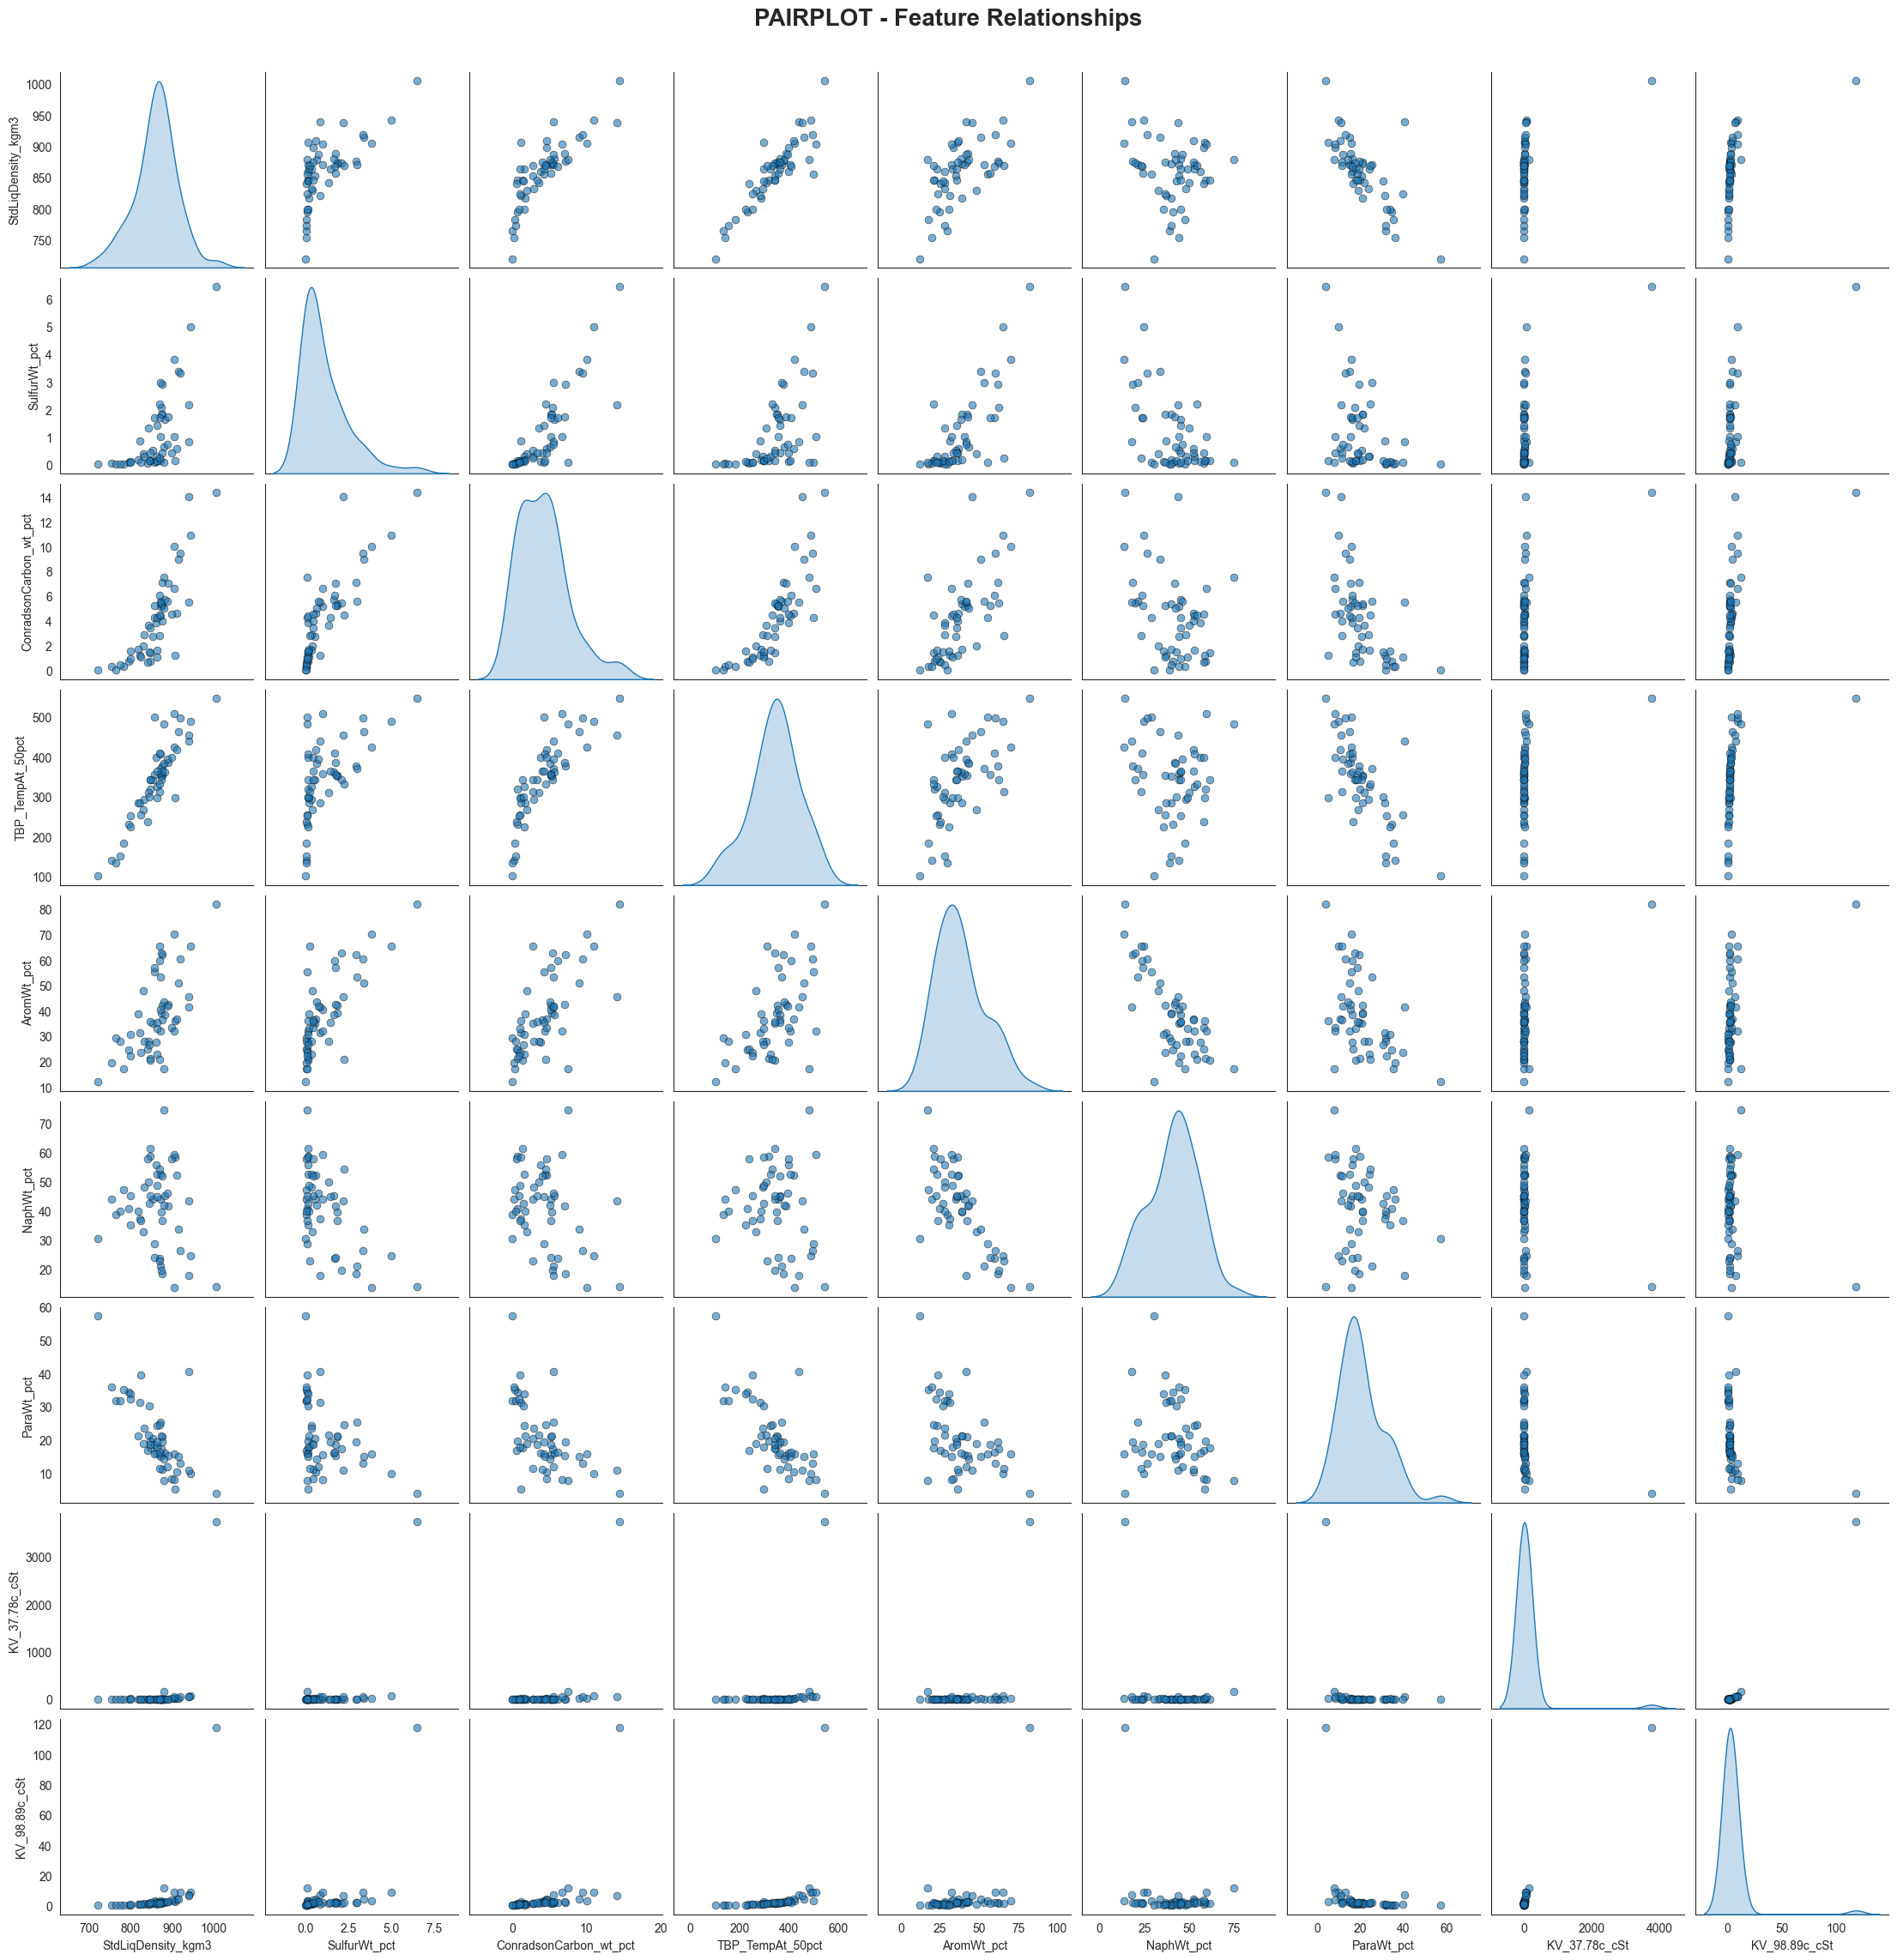

In [159]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct','TBP_TempAt_50pct',
             'AromWt_pct', 'NaphWt_pct', 'ParaWt_pct', 'KV_37.78c_cSt', 'KV_98.89c_cSt']

sns.pairplot(df[variables], diag_kind='kde', plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'})
plt.suptitle("PAIRPLOT - Feature Relationships", fontsize=20, fontweight="bold",y=1.02)

#### 4.3.2 Correlation Map

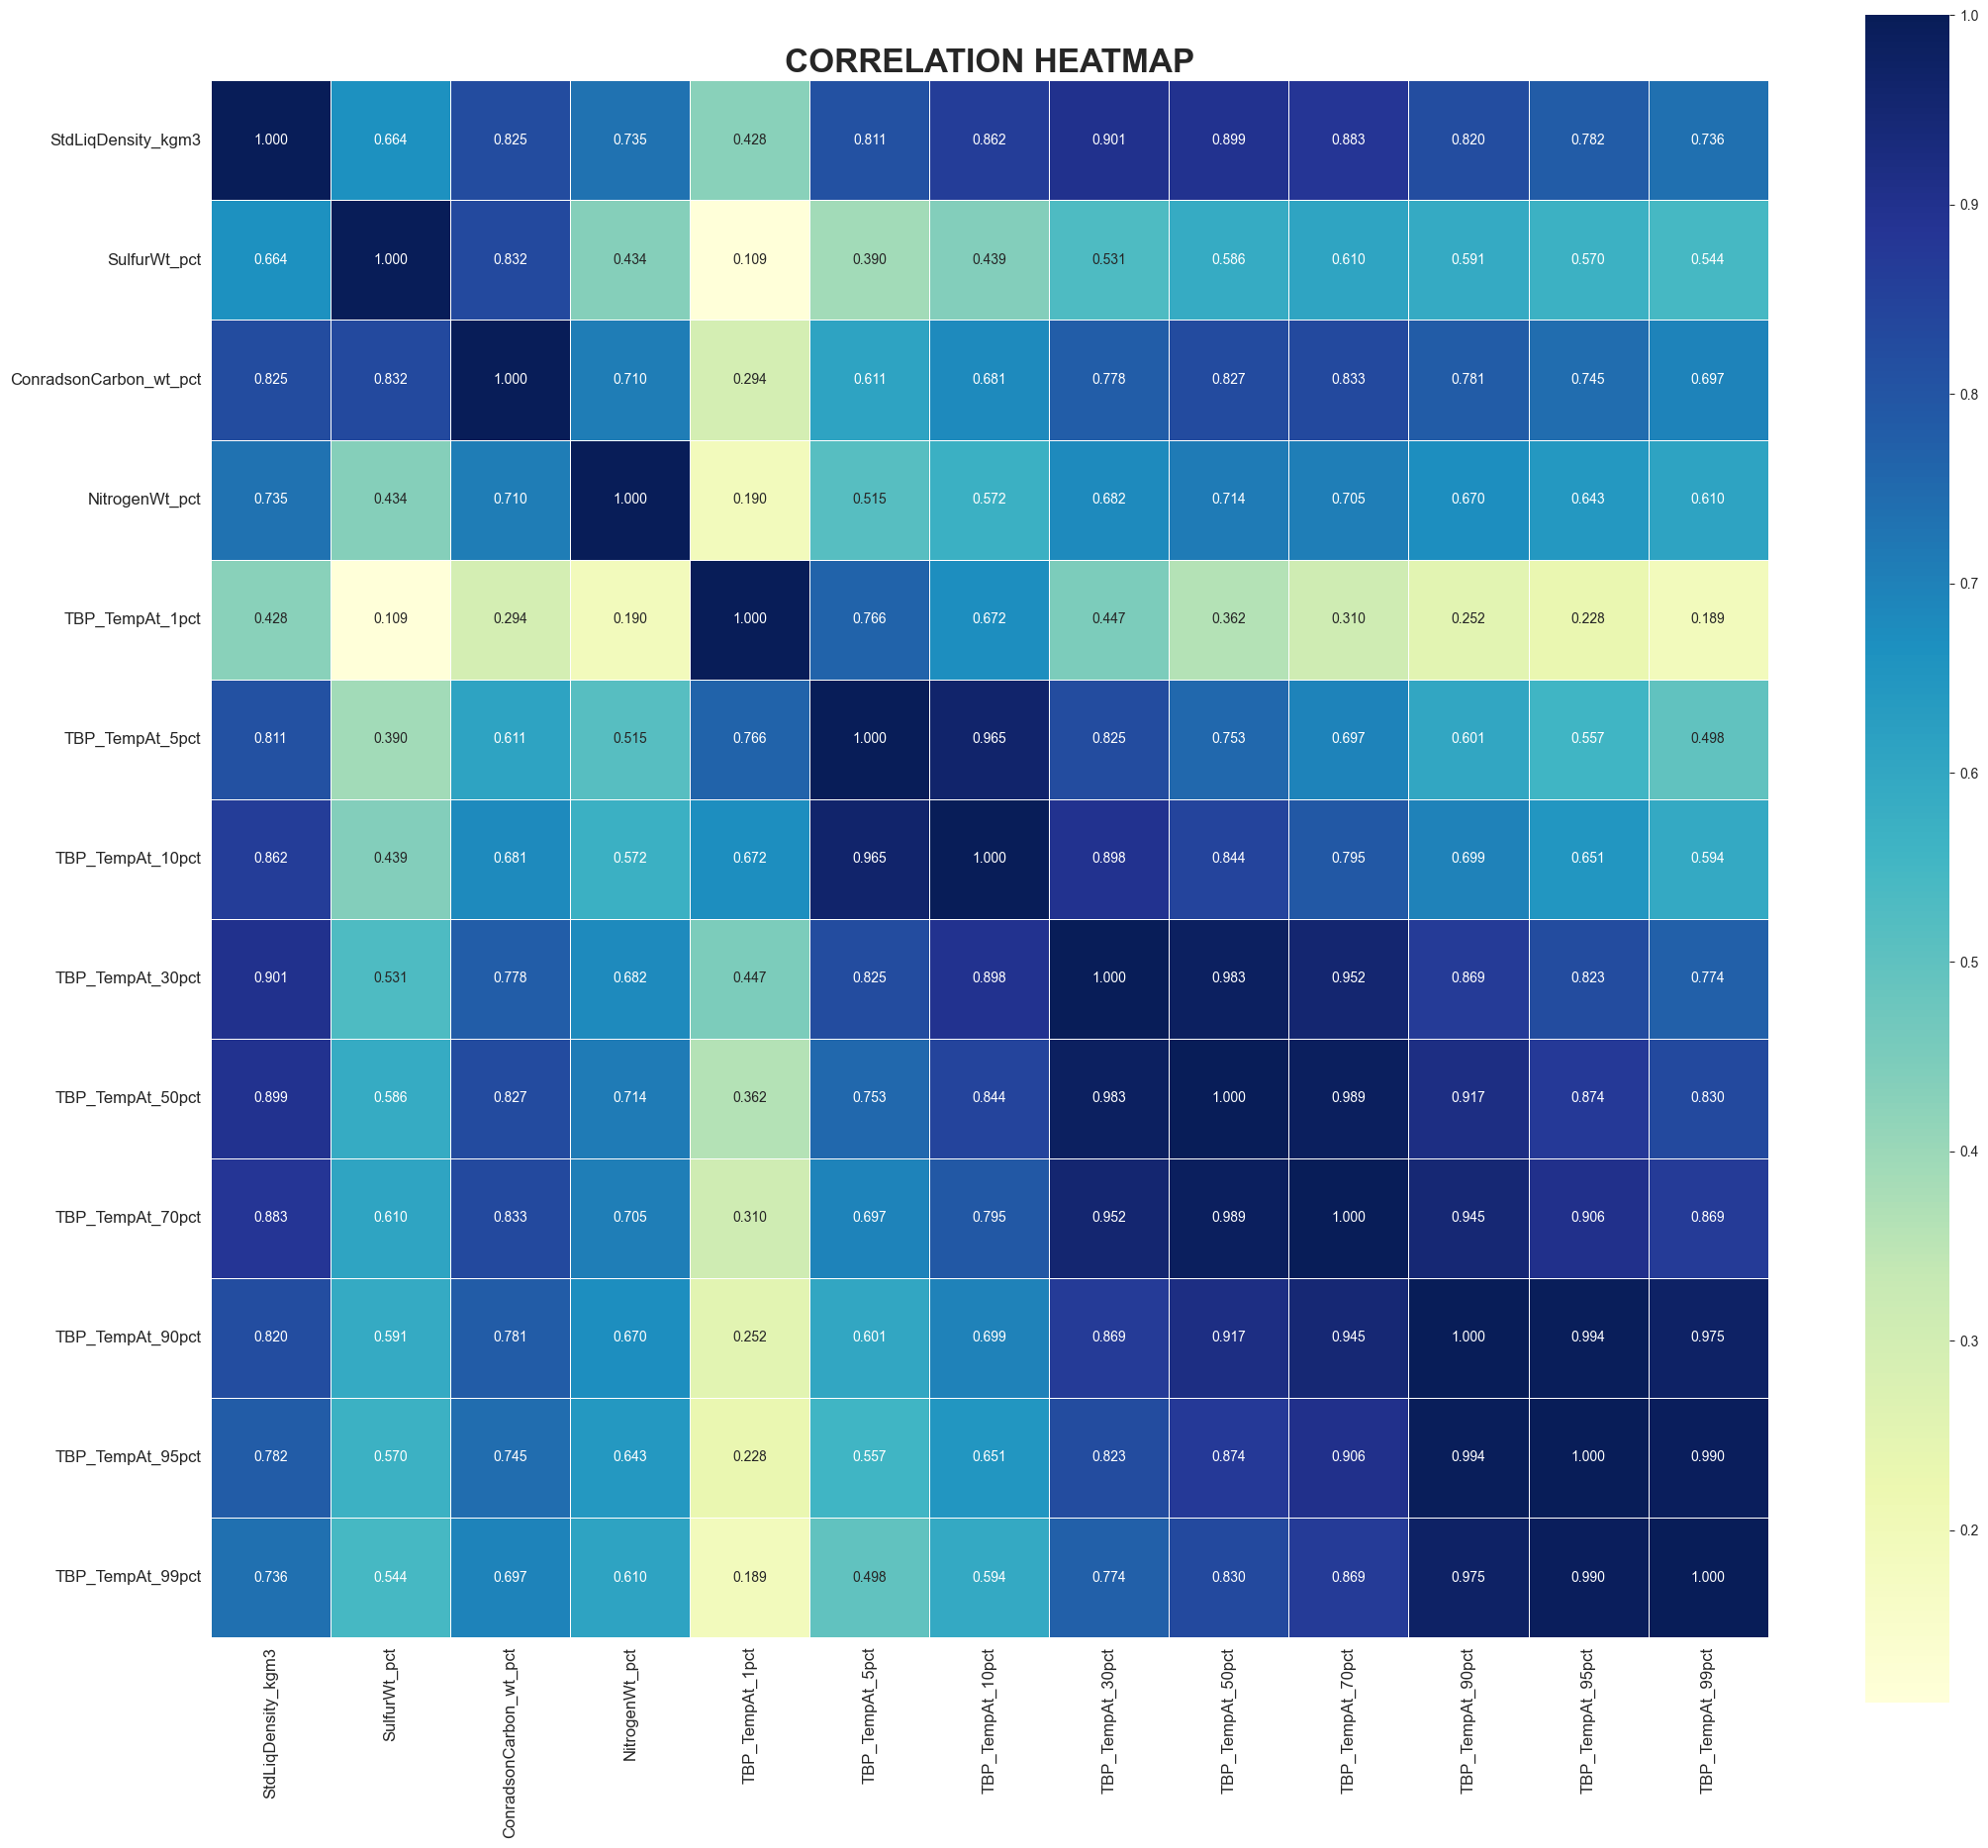

In [ ]:
variables = ['StdLiqDensity_kgm3', 'SulfurWt_pct', 'ConradsonCarbon_wt_pct', 'NitrogenWt_pct','TBP_TempAt_1pct', 'TBP_TempAt_5pct', 'TBP_TempAt_10pct', 
            'TBP_TempAt_30pct', 'TBP_TempAt_50pct', 'TBP_TempAt_70pct', 'TBP_TempAt_90pct', 'TBP_TempAt_95pct', 'TBP_TempAt_99pct']
#Correlation matrix
corr_matrix = df[variables].corr()

#Plot heatmap
plt.figure(figsize=(22, 22))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='YlGnBu', square=True, cbar_kws={"shrink": 0.8}, linewidths=0.7)

plt.title('CORRELATION HEATMAP', fontsize=24, fontweight='bold', y=1)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
